# **Prediction of hardness for AL-Alloys**




On the onset, prediction of properties such as strength, hardness using chemical composition is common in Machine learning world. However, there are few research papers related to the prediction of properties which claims the result to be better when physical metallurgical (PM) properties are also taken as input parameters.

In the upcoming codes we will prepare three sets of models for different input features such as,

1.   Chemical composition, PM properties and Age harening parameters
2.   Chemical composition and Age harening parameters
3.   PM properties and Age harening parameters

to compare the influence of physical metallurgical parameters and chemical composition to change the target variable (Hardness)





The Chronology of the project:

1. Introduction
2. Data Cleaning and Exploration
3. Effect of Alloying elements - Exploratory Data Analysis
4. Model Generation
5. Hyper-Parameter Optimization
6. Model Testing

**1. Entire Dataset - Chemical composition, Physical metallurgical parameters, Age hardening parameters.**

**Introduction:**

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the dataset

df = pd.read_excel('dataset_hardness_al.xlsx')
df

Hardness      Al      Cu  ...  Temearture (K)   Unnamed: 34      Reference 
0          169  0.9338  0.0150  ...              403          NaN  Scr mat 64, 21
1          174  0.9338  0.0150  ...              403          NaN  Scr mat 64, 21
2          180  0.9338  0.0150  ...              403          NaN  Scr mat 64, 21
3          196  0.9338  0.0150  ...              403          NaN  Scr mat 64, 21
4          187  0.9338  0.0150  ...              403          NaN  Scr mat 64, 21
...        ...     ...     ...  ...              ...          ...             ...
1586       180  0.9140  0.0033  ...              298          NaN     JAC 530, 71
1587       179  0.9140  0.0033  ...              298          NaN     JAC 530, 71
1588       178  0.9140  0.0033  ...              298          NaN     JAC 530, 71
1589       177  0.9140  0.0033  ...              298          NaN     JAC 530, 71
1590       177  0.9140  0.0033  ...              298          NaN     JAC 530, 71

[1591 rows x 36 columns]

**Data Cleaning and exploration:**

In [2]:
# checking the information of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hardness               1591 non-null   int64  
 1   Al                     1591 non-null   float64
 2   Cu                     1591 non-null   float64
 3   Mg                     1591 non-null   float64
 4   Si                     1591 non-null   float64
 5   Zn                     1591 non-null   float64
 6   Zr                     1591 non-null   float64
 7   Mn                     1591 non-null   float64
 8   Ag                     1591 non-null   float64
 9   Li                     1591 non-null   float64
 10  Ca                     1591 non-null   int64  
 11  Fe                     1591 non-null   float64
 12  Ti                     1591 non-null   float64
 13  Sn                     1591 non-null   float64
 14  Cr                     1591 non-null   float64
 15  Ge  

*Observation:*

From the output it can be seen that input fearues does not contain any missing values in the dataset. the column unnamed:34 seems to not have any data, therefore the same can be removed from the dataset. Also, target variable needs to be split from the dataframe.

In [3]:
# dropping the unwanted columns to clean the dataset.

df = df.drop(['Unnamed: 34'], axis=1)
df = df.drop(['Reference '], axis=1)
df.shape

(1591, 34)

In [4]:
# checking for NaN values/ missing values.
df.isna().values.any()

False

Observation: There are no NaN values or missing values in the dataset.

In [5]:
# finding the correlation of the dataset
df_corr = df.corr()
df_corr

Hardness        Al  ...  Time  (min)  Temearture (K) 
Hardness               1.000000 -0.450985  ...    -0.020543        -0.041375
Al                    -0.450985  1.000000  ...     0.089445         0.077664
Cu                     0.311972 -0.056162  ...     0.033108         0.069952
Mg                    -0.172169 -0.482102  ...    -0.021487         0.034597
Si                    -0.164556 -0.068817  ...    -0.058842         0.165572
Zn                     0.483116 -0.772297  ...    -0.093150        -0.238532
Zr                     0.414579 -0.607245  ...    -0.038959        -0.057489
Mn                     0.080190 -0.442601  ...    -0.025049        -0.083632
Ag                     0.334306 -0.112057  ...     0.021869         0.125045
Li                     0.120339  0.040928  ...    -0.055314        -0.077559
Ca                          NaN       NaN  ...          NaN              NaN
Fe                     0.088905 -0.416347  ...    -0.083830        -0.076930
Ti                     0.149596 -0.426752  ...    -0.034469         0.095789
Sn                     0.119093 -0.104386  ...    -0.020205        -0.031367
Cr                     0.160843 -0.181746  ...    -0.056092        -0.017529
Ge                    -0.037401  0.072641  ...    -0.025039         0.108233
Sc                     0.321486 -0.305961  ...    -0.046120        -0.225578
EN                     0.265321  0.151841  ...     0.010544         0.060793
VE                    -0.557625  0.618687  ...     0.016416         0.071405
Atomic number          0.704979 -0.774502  ...    -0.059995        -0.140203
mass                   0.707888 -0.757712  ...    -0.057444        -0.137281
Melting point         -0.031022  0.114255  ...     0.019036         0.215091
Boiling point         -0.240093  0.750164  ...     0.072286         0.162110
Density                0.687723 -0.627544  ...    -0.039466        -0.115648
Electroaffinity        0.005018  0.368275  ...     0.038811         0.165641
Fusion heat           -0.179752  0.101450  ...    -0.029702         0.201220
atomic radius          0.506512 -0.882097  ...    -0.065912        -0.115183
Specfic heat          -0.585559  0.692364  ...     0.035957         0.093722
Heat of Vaporization  -0.237640  0.742447  ...     0.068251         0.162881
thermal conductivity   0.002205  0.503611  ...     0.082917         0.142077
group                  0.004358  0.653769  ...     0.036525         0.009341
period                 0.685891 -0.768543  ...    -0.057299        -0.133214
Time  (min)           -0.020543  0.089445  ...     1.000000        -0.224626
Temearture (K)        -0.041375  0.077664  ...    -0.224626         1.000000

[34 rows x 34 columns]

*Initial Observation:*
1. Calcium has NaN values, lets look at the unique values in the Ca column.
2. Many physical metallurgical parameters seems to have a good correlation with each other.

In [6]:
# Checking for uniques values in Ca column
df['Ca'].unique()

array([0])

In [7]:
# since there are no values throughout Calcium column, we can remove that feature from the input feature list.

df = df.drop(['Ca'], axis=1)
df.shape

(1591, 33)

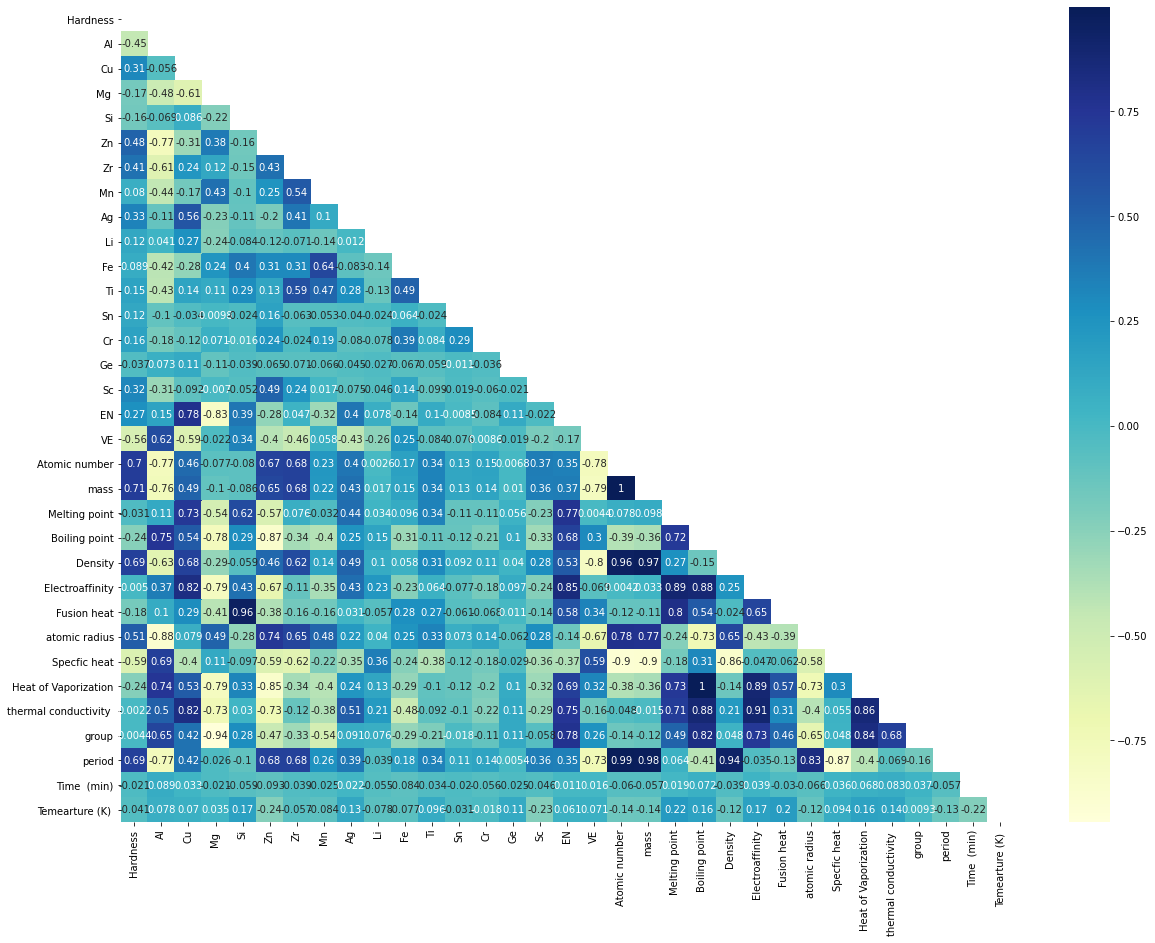

In [8]:
#  correlation plot after dropping Ca

df_corr = df.corr()
plt.subplots(figsize=(20,15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix,cmap="YlGnBu")

*Observation:*

From the above heat map we could understand that, 
1. most of the chemical element paramters are collinear with certain physical metallurgucal properties, like Si and Fusion heat (they are highly correlated) and
2. similarly physical parameters are also correlated with themselves to certain degree at higher level. (atomic number, mass, density and period are highly correlated with each other)
3. Boiling point & heat of vapourisation has correlation of 1, which means we can remove either one of the input feature as it does not give any valuable input for predicting the output, similarly mass and atomic number.
4. since most of the physical metallurgical paramters are highly correlated with the chemical composition and physical metallurgical properties, they could raise the issue of multicollinearity in our regression problem.

In [9]:
# processing the column names
df.columns

Index(['Hardness', 'Al', 'Cu', 'Mg ', 'Si', 'Zn', 'Zr', 'Mn', 'Ag', 'Li', 'Fe',
       'Ti', 'Sn', 'Cr', 'Ge', 'Sc', 'EN', 'VE', 'Atomic number', 'mass',
       'Melting point', 'Boiling point', 'Density', 'Electroaffinity',
       'Fusion heat', 'atomic radius', 'Specfic heat', 'Heat of Vaporization',
       'thermal conductivity ', 'group', 'period', 'Time  (min)',
       'Temearture (K) '],
      dtype='object')

In [10]:
# renaming the columns without gap for convenience
df = df.rename(columns={"Atomic number": "atomic_number", "Melting point": "melting_point","Boiling point": "boiling_point","Fusion heat": "fusion_heat",
                        "atomic radius":"atomic_radius","Specfic heat": "specific_heat","Heat of Vaporization": "heat_of_vaporization","thermal conductivity ": "thermal_conductivity",
                        "Time  (min)":"Time_min",'Temearture (K) ':"temp_K"})

In [11]:
# splitting the dataset to input and target variables
x_value = df.drop(['Hardness'],axis=1)
names = list (x_value.columns)
x_value = np.array(x_value)
y_value = np.array(df['Hardness'])

In [12]:
# Dataframe after seperation - Input variable
df_sep = pd.DataFrame(x_value, columns=names)
df_sep

Al      Cu    Mg       Si  ...    group  period  Time_min  temp_K
0     0.9338  0.0150  0.025  0.0000  ...  13.0384  3.1644      60.0   403.0
1     0.9338  0.0150  0.025  0.0000  ...  13.0384  3.1644     180.0   403.0
2     0.9338  0.0150  0.025  0.0000  ...  13.0384  3.1644     360.0   403.0
3     0.9338  0.0150  0.025  0.0000  ...  13.0384  3.1644     720.0   403.0
4     0.9338  0.0150  0.025  0.0000  ...  13.0384  3.1644     900.0   403.0
...      ...     ...    ...     ...  ...      ...     ...       ...     ...
1586  0.9140  0.0033  0.019  0.0011  ...  12.6680  3.0665    1440.0   298.0
1587  0.9140  0.0033  0.019  0.0011  ...  12.6680  3.0665    1680.0   298.0
1588  0.9140  0.0033  0.019  0.0011  ...  12.6680  3.0665    1920.0   298.0
1589  0.9140  0.0033  0.019  0.0011  ...  12.6680  3.0665    2160.0   298.0
1590  0.9140  0.0033  0.019  0.0011  ...  12.6680  3.0665    2880.0   298.0

[1591 rows x 32 columns]

**Effect of Allowing element - Hardness (Exploratory Data Analysis)**

In [13]:
# train test split with 20% on testing set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_sep,y_value,test_size=0.20,random_state=1)

In [14]:
import plotly.figure_factory as ff

fig = ff.create_table(round(x_train.describe().reset_index(),6))
fig.layout.width=5500

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
    
fig.update_layout(
    title_text = 'Statistics of Training set',
    margin = {'t':50}
)
    
fig.show()

*Obervation:*

From the table we can understand that,

1. Maximum alloying elements % allowed was 12%. commonly about 6% of various alloying elemets are added to Al matrix for getting reasonable hardness.
2. Most commonly added alloying elements are Cu, Mg and Si. Other elements are addition in the dataset is uncommon (about 1-25% of the entire dataset).
3. In age harening parameters, Maximum heat treatment temperature in K is 508 and Minimum is 293K, approximately 420K is used for most of the heat-treatment process.
4. Time for Heat-treatment, most commonly used is 6600 mins (approx), However for certain combinations of alloying elements, 300,000 Mins of heat-treatment is carried out.

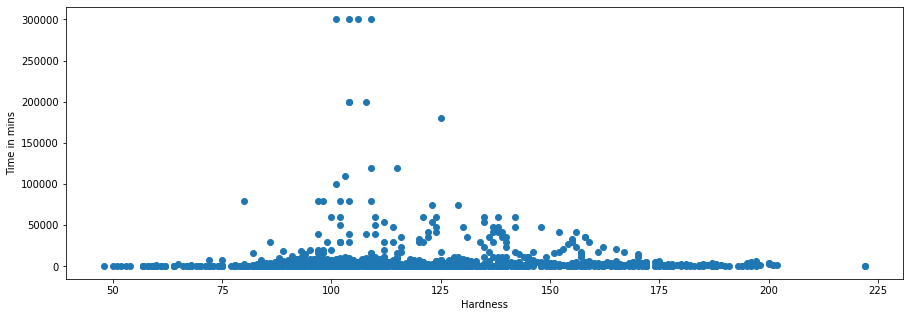

In [15]:
# Checking for outliers using gaussian distribution

plt.figure(figsize=(15,5))
plt.scatter(y_train,x_train['Time_min'])
plt.xlabel('Hardness')
plt.ylabel('Time in mins')
plt.show()

*Observation:* We can see that most of the points are heavily distributed around 85-175 in x axis (hardness). There are few observations which are heat-treated for huge duration to obtain hardness in range of 100-125. We can check if the data is an outlier using gaussian distribution with 3 Standard deviaion.

*Outlier detection using Z score:*

Z score = (x -mean) / std. deviation, usually 3 SD will comprise most of the data and the features outside the three standard deviation range is considered to be an outlier. Eventhough it is difficult to put heat-treatment time in a histogram plot to obtain the distribution, it can be achieved by classifying haet-treatment time into groups. However for simplicity, the outlier is found by using scatter plot.



In [16]:
# Mean and Standard deviation calculation
time_std = np.std(x_train['Time_min'])
time_mean = np.mean(x_train['Time_min'])
print ("The mean and standard deviation for time in mins are: {},{}".format(time_std, time_mean))

The mean and standard deviation for time in mins are: 23253.427413520796,6643.933176100629


In [17]:
# Cheking for outlier using 3 SD using gaussian distribution
threshold = 3
outlier = []
hard = []
for i,j in enumerate (x_train['Time_min']):
  z = (j-time_mean)/time_std
  if z > threshold:
      outlier.append(j)
      hard.append(y_train[i])
print('outlier in Time in mins column is', outlier)
print('outlier hardness corresponding to time in dataset is', hard)

outlier in Time in mins column is [200000.0, 80000.0, 120000.0, 200000.0, 200000.0, 110000.0, 80000.0, 100000.0, 180000.0, 80000.0, 300000.0, 300000.0, 300000.0, 80000.0, 80000.0, 80000.0, 300000.0, 120000.0]
outlier hardness corresponding to time in dataset is [108, 80, 115, 104, 104, 103, 109, 101, 125, 97, 104, 109, 106, 102, 98, 104, 101, 109]


In [18]:
# outlier in days - Unique values
final_list = list(map(lambda x: (x/(24*60)) , outlier))
print(np.unique(np.array(final_list)))

[ 55.55555556  69.44444444  76.38888889  83.33333333 125.
 138.88888889 208.33333333]


*Obervation:*
Using Z score with 3 SD, it can be found that the values 55,69,76,83,125,138 and 208 days heat-treatment time in days could be an outlier.

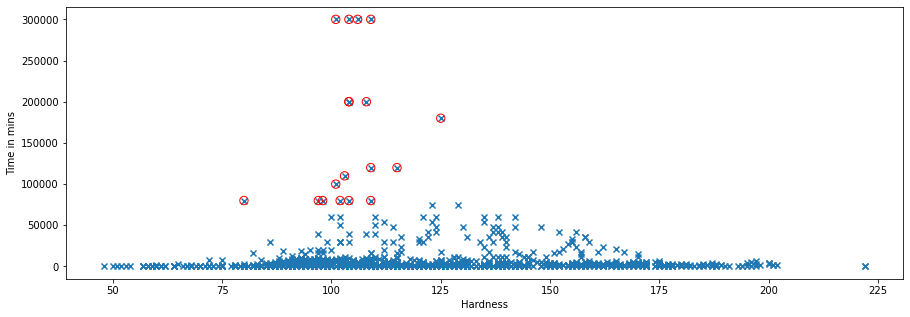

In [19]:
# plotting the graph with outlier
plt.figure(figsize=(15,5))
plt.scatter(y_train,x_train['Time_min'],marker="x")
plt.scatter(hard,outlier,marker="o",facecolor="none",edgecolor="r",s=70,label='Outlier');
plt.xlabel('Hardness')
plt.ylabel('Time in mins')
plt.show()

*Observation:*

From the graph it is understood that some of the hardness value with respect to time seems to be outliers, some of the age hardening time in days is taking almost 200 days, which is very difficult even in industrial set up. But since these data's are taken from the research side, we can keep the values for further analysis.

In [20]:
# comparing all the chemical elements with the harness to find the relation between them
import plotly.express as px

only_checomp_out = df[['Al', 'Cu', 'Mg ', 'Si', 'Zn', 'Zr', 'Mn', 'Ag', 'Li', 'Fe', 'Ti', 'Sn',
       'Cr', 'Ge', 'Sc','Time_min','temp_K','Hardness']]
fig = px.scatter_matrix(only_checomp_out,template="plotly")
fig.update_layout(
    autosize=False,
    width=3000,
    height=3000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))
fig.show()

*Obervation:* 

From the scatter matrix by checking the relation of the input features with respect to the input parameter we get to know the following inference,

1. The hardness of the pure or higher composition Al alloy will be less as there is a negetive correlation between Al and hardness, as the Al content increase hardness of the alloy decreases.
2. Cu, Zn and Zr seems to be positively correlated with the hardness value and seem to be influencing the output parameter most. 
3. increase in Mg and Mn content increases the hardness to an extent and afterwhich the hardness drops.
4. Si, Ag, Fe, Ti, Cr, Ge and Sc doesnt see to play an important role in determining the hardness of the material. 
5. As the age hardening temperature increases, the hardness of the material drops.
6. Alloying elements with themselves doesnt seem to have good correlation with each other based on plots.

In [21]:
# comparing all the physical metallurgical elements with the hardness and themselves to find the relation.

only_pm_out = df[['EN', 'VE', 'atomic_number', 'mass',
       'melting_point', 'boiling_point', 'Density', 'Electroaffinity',
       'fusion_heat', 'atomic_radius', 'specific_heat', 'heat_of_vaporization',
       'thermal_conductivity', 'group', 'period', 'Time_min', 'temp_K','Hardness']]
fig = px.scatter_matrix(only_pm_out,template="plotly")
fig.update_layout(
    autosize=False,
    width=3000,
    height=3000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))
fig.show()

*Observation:*


Unlike chemical composition, physical metallurgical parameters have clear distinct correlation with the output target variable (Hardness). 

1. EN, Atomic number, Mass, Density, Atomic radius, Period are the input parameters which are higly correlated with hardness.
2. VE, boiling_point, specific_heat, group are negetively correlated.
3. some physical metallurgical parameters such as electron affinity,heat of vapourization, group and temp in K doesnt have a clear correlation with the output parameter.  
4. From the plots of the physical metallurgical parameters with themselves, itseems like most of the parameters are heavily correleated either positive or negetive.
5. This correlation with multiple input parameters can lead to multicollinearity issues and needs to be addressed.

*VIF: (Variation Inflation Factor)*


Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “
or
VIF score of an independent variable represents how well the variable is explained by other independent variables.

Usually if the VIF score is greater than 5, it is considered to be heavily correlated.

In [22]:
import statsmodels.api as sm

for index in range(0, len(names)):
            y = df_sep.loc[:, df_sep.columns == names[index]]
            x = df_sep.loc[:, df_sep.columns != names[index]]
            model = sm.OLS(np.array(y,dtype=float), np.array(x,dtype=float))                     #Fit ordinary least squares method
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names[index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )
            print("\n=================================================================================\n")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



R Square value of Al column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Al column is inf n


R Square value of Cu column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Cu column is inf n


R Square value of Mg  column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Mg  column is inf n


R Square value of Si column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Si column is inf n


R Square value of Zn column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Zn column is inf n


R Square value of Zr column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Zr column is inf n


R Square value of Mn column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Mn column is inf n


R Square value of Ag column is 1.0 keeping all other 

*Observation:*

All the columns are heavily correlated with each other as VIF for all the input parameters tends to infinity except time column. 

In [23]:
# Checking VIF only for physical metallugical parameters
only_pm = df[['EN', 'VE', 'atomic_number', 'mass',
       'melting_point', 'boiling_point', 'Density', 'Electroaffinity',
       'fusion_heat', 'atomic_radius', 'specific_heat', 'heat_of_vaporization',
       'thermal_conductivity', 'group', 'period', 'Time_min', 'temp_K']]
only_pm_names = list (only_pm.columns)

In [24]:
for index in range(0, len(only_pm_names)):
            y = only_pm.loc[:, only_pm.columns == only_pm_names[index]]
            x = only_pm.loc[:, only_pm.columns != only_pm_names[index]]
            model = sm.OLS(np.array(y,dtype=float), np.array(x,dtype=float))                     #Fit ordinary least squares method
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              only_pm_names[index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 only_pm_names[index], vif)
          )
            print("\n=================================================================================\n")

R Square value of EN column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of EN column is 683917938856.57 n


R Square value of VE column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of VE column is 3680576675.52 n


R Square value of atomic_number column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of atomic_number column is 414524334057.76 n


R Square value of mass column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of mass column is 30275078836.29 n


R Square value of melting_point column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of melting_point column is 245579443.01 n


R Square value of boiling_point column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of boiling_point column is 18845405510.89 n


R Square value of Density column is 1.0 keeping all oth

*Observation:*

Removing the chemical composition parameters improved the correlation dependence, but we know that most of the physical metallugical parameters used are dependent on each other, therfore we need to remove the features which are heavily correlated or have to use methods like PCA to remove the collinearity.

In [25]:
# Checking VIF only for chemical composition parameters
only_checomp = df[['Al', 'Cu', 'Mg ', 'Si', 'Zn', 'Zr', 'Mn', 'Ag', 'Li', 'Fe', 'Ti', 'Sn',
       'Cr', 'Ge', 'Sc','Time_min','temp_K']]
only_cc_names = list (only_checomp.columns)

In [26]:
for index in range(0, len(only_cc_names)):
            y = only_checomp.loc[:, only_checomp.columns == only_cc_names[index]]
            x = only_checomp.loc[:, only_checomp.columns != only_cc_names[index]]
            model = sm.OLS(np.array(y,dtype=float), np.array(x,dtype=float))                     #Fit ordinary least squares method
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              only_cc_names[index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 only_cc_names[index], vif)
          )
            print("\n=================================================================================\n")

R Square value of Al column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of Al column is 72.74 n


R Square value of Cu column is 0.88 keeping all other columns as independent features
Variance Inflation Factor of Cu column is 8.02 n


R Square value of Mg  column is 0.83 keeping all other columns as independent features
Variance Inflation Factor of Mg  column is 5.76 n


R Square value of Si column is 0.67 keeping all other columns as independent features
Variance Inflation Factor of Si column is 3.06 n


R Square value of Zn column is 0.71 keeping all other columns as independent features
Variance Inflation Factor of Zn column is 3.5 n


R Square value of Zr column is 0.82 keeping all other columns as independent features
Variance Inflation Factor of Zr column is 5.48 n


R Square value of Mn column is 0.79 keeping all other columns as independent features
Variance Inflation Factor of Mn column is 4.81 n


R Square value of Ag column is 0.56 kee

*Observation:*

From the above it can be seen that the physical metallurgical parameters are correlated with each other where as in chemical composition the VIF values are not high as compared with physical metallurgical parameters. Therefore for further analysis, PCA is used to reduce the number of features as well as to reduce the collinearity in the data.

In [27]:
# Using PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

# Fit transform PCA on the standardized training data
sc = StandardScaler()
X = sc.fit_transform(x_train)
X.shape

(1272, 32)

In [28]:
from sklearn.decomposition import PCA
nitems = 32 # Intotal 32 features (Input parameters)
pca = PCA(n_components=nitems)
X_pca = pca.fit_transform(X)

In [29]:
# Total explained variance using all the Principal components
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.9999999999999998

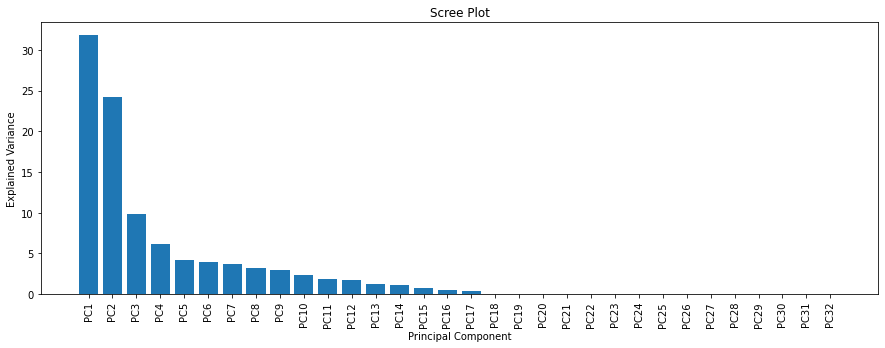

In [30]:
# Visualisation of the PC's 

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(15, 5))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.title('Scree Plot')
plt.show()

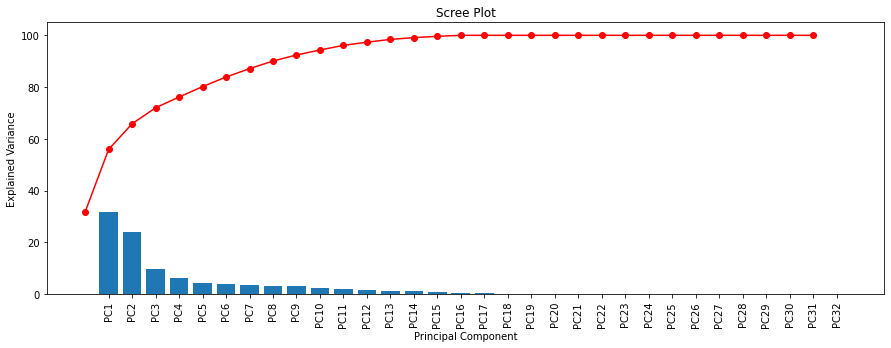

In [31]:
# Scree plot 
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(15, 5))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100,'r-o',label="Cum EV")
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.title('Scree Plot')
plt.show()

*Observation:*

From the scree plot it can be seen that the maximum variation can be explained with only 11-13 PC's.

In [32]:
# Choosing 11 PCA to explain the variance 

nitems = 11
pca = PCA(n_components=nitems)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.9431977506166705

In [33]:
# Creating Dataframe for PC's

labels = ['PC' +str(x) for x in range(1,12)]
df_pca = pd.DataFrame(X_pca,columns = labels)
df_pca

PC1       PC2       PC3  ...       PC9      PC10      PC11
0     0.008339  5.113613 -0.874532  ... -0.509787 -0.115390  0.397092
1    -1.494551  0.545819 -1.102847  ... -0.587881 -0.072947  0.171074
2     4.957327  0.325894 -0.039573  ...  0.208219 -4.158726  0.199545
3     5.257528 -2.457907  2.843018  ...  0.559167  0.354219 -0.565560
4    -1.994240  0.668964  1.338025  ... -0.101094 -1.875989  0.559406
...        ...       ...       ...  ...       ...       ...       ...
1267 -2.106987 -0.029173 -0.266465  ... -0.239472 -0.111700 -0.237206
1268  7.329967  2.870764 -1.974120  ... -0.011085 -0.817822 -1.533905
1269 -2.198450  0.652364 -2.137606  ...  0.769099  0.198894  0.369506
1270 -2.242017 -1.820788 -0.619153  ... -0.248758  0.463333 -1.269477
1271 -3.721242 -2.365032  0.258017  ... -0.806426  0.282690 -0.091301

[1272 rows x 11 columns]

In [34]:
# checking multicollinearity for the PC's
for index in range(0, len(labels)):
            y = df_pca.loc[:, df_pca.columns == labels[index]]
            x = df_pca.loc[:, df_pca.columns != labels[index]]
            model = sm.OLS(np.array(y,dtype=float), np.array(x,dtype=float))                     #Fit ordinary least squares method
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              labels[index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 labels[index], vif)
          )
            print("\n=================================================================================\n")

R Square value of PC1 column is -0.0 keeping all other columns as independent features
Variance Inflation Factor of PC1 column is 1.0 n


R Square value of PC2 column is 0.0 keeping all other columns as independent features
Variance Inflation Factor of PC2 column is 1.0 n


R Square value of PC3 column is 0.0 keeping all other columns as independent features
Variance Inflation Factor of PC3 column is 1.0 n


R Square value of PC4 column is 0.0 keeping all other columns as independent features
Variance Inflation Factor of PC4 column is 1.0 n


R Square value of PC5 column is 0.0 keeping all other columns as independent features
Variance Inflation Factor of PC5 column is 1.0 n


R Square value of PC6 column is 0.0 keeping all other columns as independent features
Variance Inflation Factor of PC6 column is 1.0 n


R Square value of PC7 column is 0.0 keeping all other columns as independent features
Variance Inflation Factor of PC7 column is 1.0 n


R Square value of PC8 column is 0.0 keep

*Observation:*

Since we have taken principal componenets (Eigen vectors), they are independent with each other and therefore we dont have any collinearity in out dataset. Now linear models can be used to predict the target variable.

**Model development**

In [35]:
# importing libraries for metrics - Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Dummy variables to store the output
rmse = []
r2val = []
cv_score = []
mae = []
cv_graph = []

# function for fitting the model
def model_gen(x,y):
  for i in models:
      model=i
      model.fit(x,y)
      y_hat=model.predict(x)
      score=cross_val_score(model,x,y,cv=10,scoring='r2')
      performance(y_hat,y,model,x,score) 

# Function for evaluating the performance of the model  
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------\n\n')
    print('Mean absolute error ',np.round(mean_absolute_error(p,ytest),4))
    mae.append(np.round(mean_absolute_error(p,ytest),4))
    print('----------------------------------------------------------')
    print('Root mean squared error',mean_squared_error(p,ytest,squared = False))
    rmse.append(mean_squared_error(p,ytest,squared = False))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    cv_score.append(np.round(s.mean(),4))
    cv_graph.append(s)
    print('----------------------------------------------------------')
    print('R squared value',r2_score(p,ytest))
    r2val.append(r2_score(p,ytest))
    print('----------------------------------------------------------\n\n')


In [36]:
# importing libraries for model generation

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# Models used for generation
models = [LinearRegression(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor()]

In [37]:
# model implementation
model_gen(df_pca,y_train)

# Storing CV score in another list for comparision
before_hpop = []
for i in range(len(cv_score)):
  before_hpop.append(cv_score[i])

------------------------------------ LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ------------------------------------


Mean absolute error  16.4944
----------------------------------------------------------
Root mean squared error 20.88176575623125
----------------------------------------------------------
Mean of Cross Validation Score 0.5307
----------------------------------------------------------
R squared value 0.15382249817182314
----------------------------------------------------------


------------------------------------ SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) ------------------------------------


Mean absolute error  15.3681
----------------------------------------------------------
Root mean squared error 20.261377143202523
----------------------------------------------------------
Mean of Cross Validation Score 0.5489
--------

In [38]:
# Presenting the model output in table format

models_short = ['LR','SVR','KNN','RF','GBT','XGB']
compiled_result_df = pd.DataFrame({'Models':models_short,'MAE' : mae,
                                'RMSE' : rmse,
                                'R_Squared' : r2val,
                                'cv_score_val': cv_score }, 
                                columns=['Models','MAE','RMSE', 'R_Squared','cv_score_val'])

fig = ff.create_table(round(compiled_result_df,4))
fig.layout.width=1000

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
    
fig.update_layout(
    title_text = 'Output of Intial model development',
    margin = {'t':50}
)
    
fig.show()

*Inference:*

From the table it can be seen that random forest performed better compared to all the other models, however the same needs to be checked though hyper-parameter optimization.

In [39]:
# plotting line chart for the 10 fold cross validation
import plotly.graph_objects as go
n_folds = list(range(1,11))
fig = go.Figure()
for i in range (len(models_short)):
  fig.add_trace(go.Scatter(x=n_folds, y=cv_graph[i],
                      mode='lines+markers',
                      name=models_short[i]))
fig.update_layout(
    title = "R squared value of the validation set in 10 fold cross validation",
    xaxis_title="Number of folds",
    yaxis_title="R Squared values"
)

fig.show()

*Obervation:*

From the plot, it can be understood that the random forest regressor performed the best in all the 10 folds compared to other models. However we may need to finetune the model further more using randomsearch CV or grid search CV method.

In [40]:
# plotting the result of the initial output in bar chart
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3, shared_xaxes=True,subplot_titles=("MAE Value","RMSE Value", "R2 Value"))
fig.add_trace(go.Bar(x=models_short, y=mae, marker=dict(coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=models_short, y=rmse, marker=dict(coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Bar(x=models_short, y=r2val, marker=dict(coloraxis="coloraxis")), 1, 3)

# Update xaxis properties
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Models", row=1, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="Mean absolute error", row=1, col=1)
fig.update_yaxes(title_text="Root mean square error", row=1, col=2)
fig.update_yaxes(title_text="R squared value", row=1, col=3)

fig.update_layout(showlegend=False,)
fig.show()

*Observation:*

From the result we can understand that the random forest algorithm worked better than other models and the results of the cross validation test score also seem to be higher. however the models will be tested with grid search CV or randomised search CV to find the effective result without overfitting or underfitting the data.


**Hyper-Parameter Tuning**

In [41]:
# Randomized search CV on Random forest regressor 

rf = RandomForestRegressor()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print ("\n Parameters to be used with Randomized search CV are: \n")
pprint(random_grid)


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 Parameters to be used with Randomized search CV are: 

{'max_depth': [5, 10, 15, 20, 25, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [42]:
# Random search of parameters, using 5 fold cross validation, 
# search across 500 different combinations
# Since for running the code take almost 20-30 mins time, the section is commented

def rf_grid (x,y):
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
  rf_random.fit(x,y)
  return rf_random
#rf_random = rf_grid (df_pca,y_train)

In [43]:
# printing the best hyper parameters using randomized search CV
# commenting the lines of code and printing only the image of result

def rf_grid_result ():
  print ("Best parameters for Random forest are: \n")
  print(rf_random.best_params_)
  print(rf_random.best_estimator_)
  print("r2 score obtained on 10 fold cv: ",rf_random.best_score_)
  print ("percentage improvement from the original random forest regressor: {}% ".format(round(((rf_random.best_score_-cv_score[3])/cv_score[3])*100,2)))
#rf_grid_result()

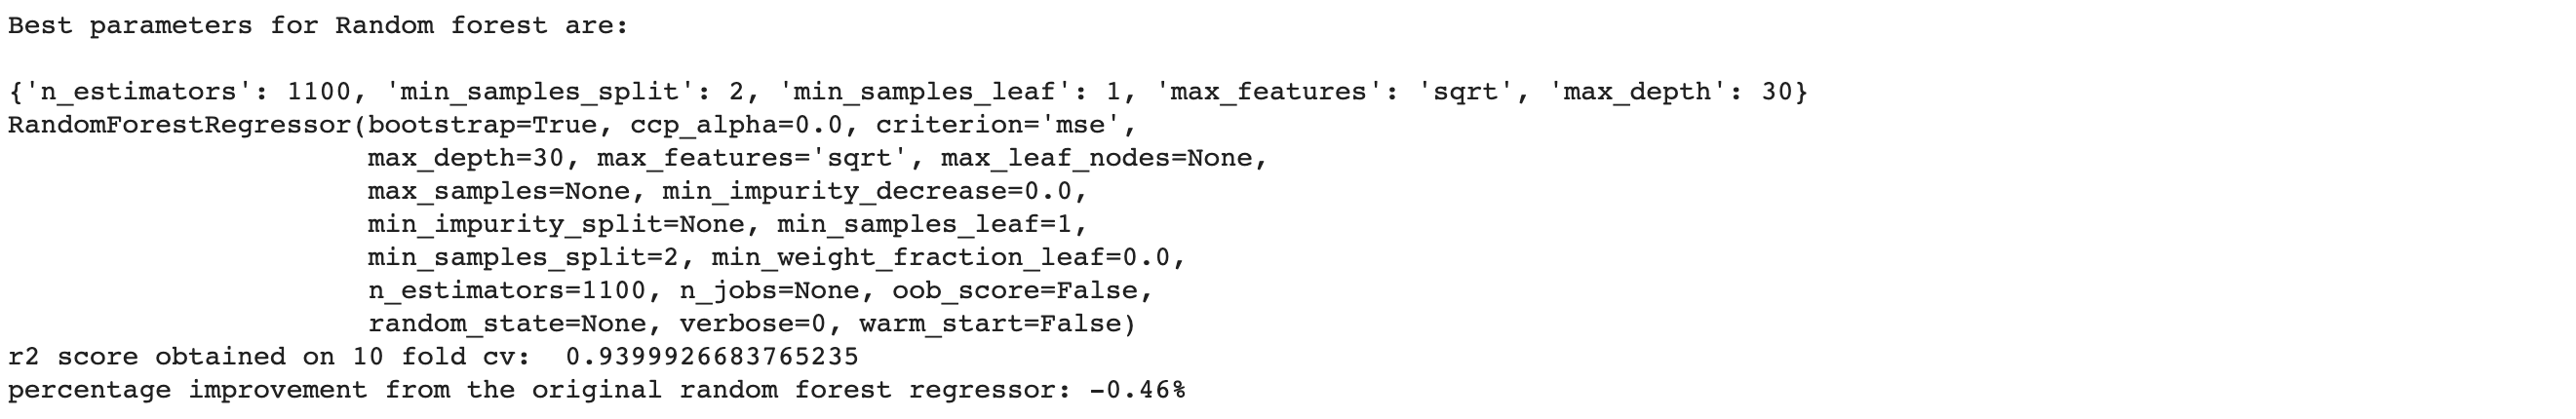

In [44]:
# Since the Hyper-Parameter optimization for Random forest took 22 mins to run, codes for those are commented
# attached image file of the result

import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread("/content/HP_RF_1.png")
cv2_imshow(img1)

In [45]:
from sklearn.model_selection import GridSearchCV
# Tuning KNN model
def knn_grid(x,y):
  #List Hyperparameters that we want to tune.
  leaf_size = list(range(1,50))
  n_neighbors = list(range(1,30))
  p=[1,2]

  #Converting to dictionary
  hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

  #Creating new KNN object
  knn_2 = KNeighborsRegressor()

  #Using GridSearch
  from sklearn.model_selection import GridSearchCV
  clf = GridSearchCV(knn_2, hyperparameters, cv=10,verbose=2)

  #Fiting the model
  best_model = clf.fit(x,y)
  return best_model

#best_model = knn_grid(df_pca,y_train)


In [46]:
#Print The value of best Hyperparameters for KNN regressor
def knn_grid_result():
  print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
  print('Best p:', best_model.best_estimator_.get_params()['p'])
  print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
  print("r2 score obtained on 10 fold cv: ",best_model.best_score_)
  print ("percentage improvement from the original KNN Regressor: {}% ".format(round(((best_model.best_score_-cv_score[2])/cv_score[2])*100,2)))

#knn_grid_result()

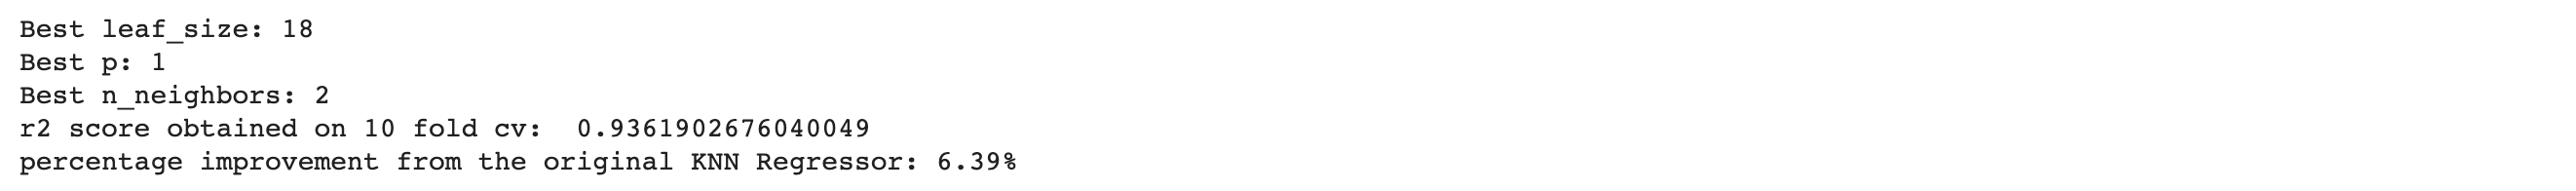

In [47]:
# Since running hyper-parameter code will take time to implement showing result though image
img1 = cv2.imread("/content/HP_KNN_1.png")
cv2_imshow(img1)

In [48]:
# Hyper-parameter tuning for GBT

def gbt_grid (x,y):
  GBR=GradientBoostingRegressor()
  search_grid={'n_estimators':[500,1000,2000],
              'learning_rate':[.001,0.01,.1],
              'max_depth':[1,2,4],
              'subsample':[.5,.75,1],
              'random_state':[1]}
  search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='r2',n_jobs=1,cv=5,verbose=2)
  search.fit(x,y)
  return search
#search = gbt_grid(df_pca,y_train)

In [49]:
# result for GBT after Hyper-parameter tuning
def gbt_grid_result ():
  print ("Best parameters for GBT are: \n")
  print(search.best_params_)
  print(search.best_estimator_)
  print("r2 score obtained on 5 fold cv: ",search.best_score_)
  print ("percentage improvement from the original GBT: {}% ".format(round(((search.best_score_-cv_score[4])/cv_score[4])*100,2)))
#gbt_grid_result ()

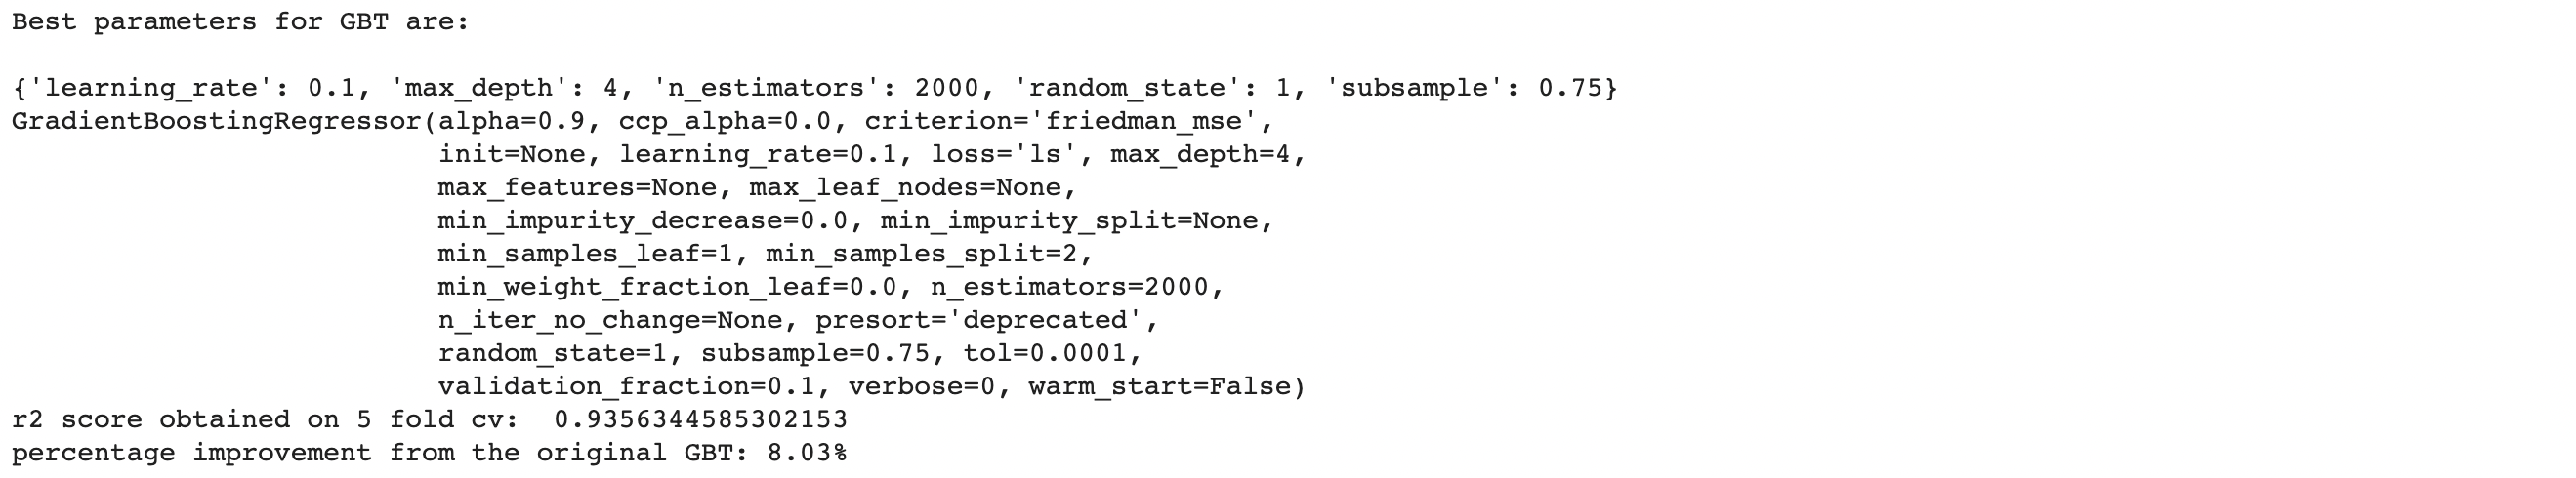

In [50]:
# Since the Hyper-Parameter optimization for GBT took 17 mins to run, codes for those are commented
# attached image file of the result

img2 = cv2.imread("/content/HP_GBT_1.png")
cv2_imshow(img2)

In [51]:
# XGBoost regressor - Hyper-Parameter Tuning
def xgbgrid (x,y):
  param_tuning = {'learning_rate': [0.01, 0.1],
                  'max_depth': [3, 5, 7, 10],
                  'subsample': [0.5, 0.7],
                  'colsample_bytree': [0.5, 0.7],
                  'min_child_weight': [1, 3, 5],
                  'n_estimators' : [100, 200, 500]
                  }

  xgb_model = XGBRegressor()

  gsearch = GridSearchCV(estimator = xgb_model,
                          param_grid = param_tuning,                        
                          scoring = 'r2', #R squared
                          cv = 5,
                          n_jobs = -1,
                          verbose = 2)

  gsearch.fit(x,y)
  return gsearch
#gsearch=xgbgrid(df_pca,y_train)

In [52]:
# result for XGB after Hyper-parameter tuning
def xgbgrid_result():
  print ("Best parameters for XGB are: \n")
  print(gsearch.best_params_)
  print(gsearch.best_estimator_)
  print("r2 score obtained on 5 fold cv: ",gsearch.best_score_)
  print ("percentage improvement from the original XGB: {}% ".format(round(((gsearch.best_score_-cv_score[5])/cv_score[5])*100,2)))
#xgbgrid_result()

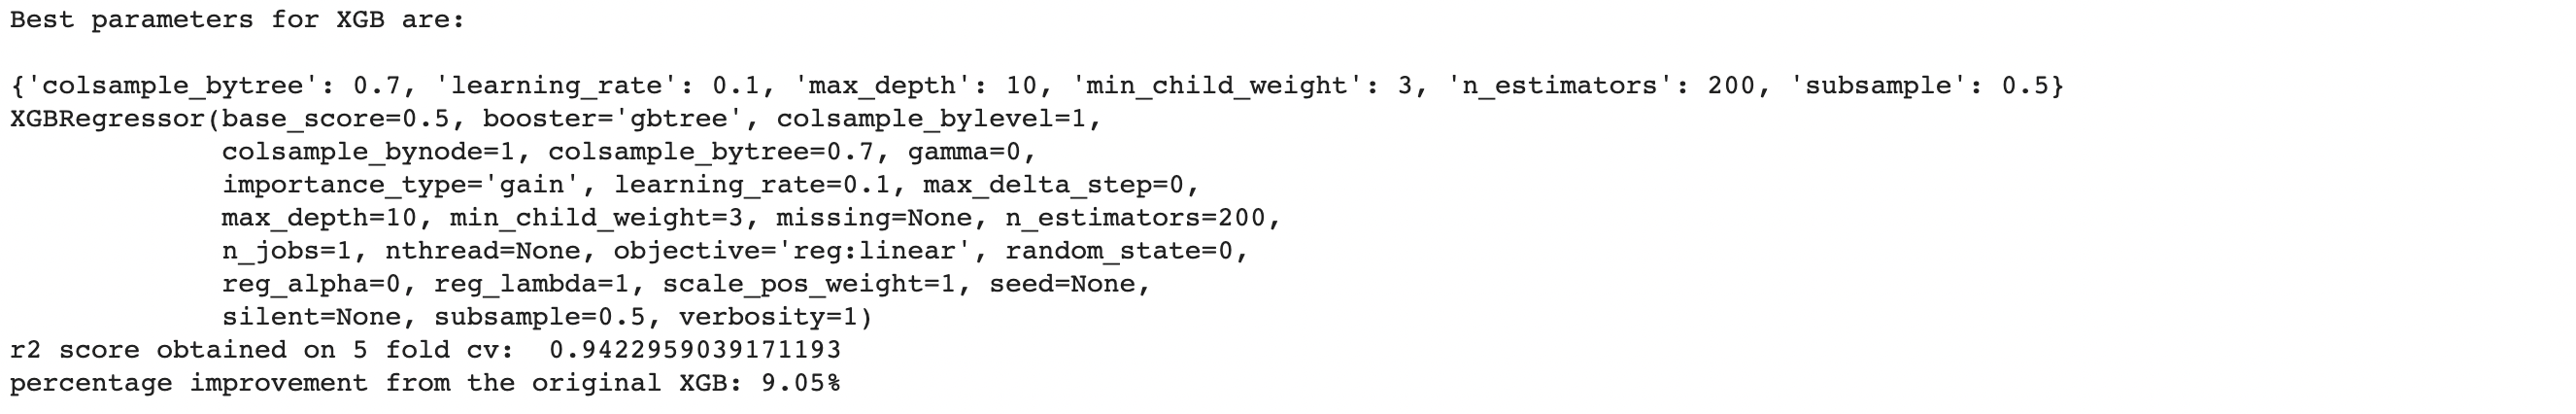

In [53]:
# displaying image of the output
img2 = cv2.imread("/content/HP_XGB_1.png")
cv2_imshow(img2)

In [54]:
# Models after hyper-parameter tuning

rmse.clear()
r2val.clear()
cv_score.clear()
mae.clear()
cv_graph.clear()
models = [LinearRegression(),
          SVR(),
          KNeighborsRegressor(algorithm='auto', leaf_size=18, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                    weights='uniform'),
          RandomForestRegressor(),
          GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False),
          xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)]

In [55]:
# model implementation after hyper-parameter tuning
model_gen(df_pca,y_train)

# Storing CV score in another list for comparision
after_hpop = []
for i in range(len(cv_score)):
  after_hpop.append(cv_score[i])

------------------------------------ LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ------------------------------------


Mean absolute error  16.4944
----------------------------------------------------------
Root mean squared error 20.88176575623125
----------------------------------------------------------
Mean of Cross Validation Score 0.5307
----------------------------------------------------------
R squared value 0.15382249817182314
----------------------------------------------------------


------------------------------------ SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) ------------------------------------


Mean absolute error  15.3681
----------------------------------------------------------
Root mean squared error 20.261377143202523
----------------------------------------------------------
Mean of Cross Validation Score 0.5489
--------

In [56]:
# Tabulation of CV score after hyper parameter tuning
# For random forest initial CV score is taken as it is the maximum rather than in randon search CV

compiled_result_df = pd.DataFrame({'Models':models_short,'MAE' : mae,
                                'RMSE' : rmse,
                                'R_Squared' : r2val,
                                'cv_score_val': cv_score }, 
                                columns=['Models','MAE','RMSE', 'R_Squared','cv_score_val'])

fig = ff.create_table(round(compiled_result_df,4))
fig.layout.width=1000

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
    
fig.update_layout(
    title_text = 'Output of Final model development',
    margin = {'t':50}
)
    
fig.show()

*Inference:*

Since our data landscape is non linear, the non linear estimate models are performing better compared to linear models. Also XGB and Random forest models are providing good training set result and cross validation result. However, XG Boost with modification to the hyperparameters provided the best result and the same is tested in the tesing data.

In [57]:
fig = make_subplots(rows=1, cols=3, shared_xaxes=True,subplot_titles=("MAE Value","RMSE Value", "R2 Value"))
fig.add_trace(go.Bar(x=models_short, y=mae, marker=dict(coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=models_short, y=rmse, marker=dict(coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Bar(x=models_short, y=r2val, marker=dict(coloraxis="coloraxis")), 1, 3)

# Update xaxis properties
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Models", row=1, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="Mean absolute error", row=1, col=1)
fig.update_yaxes(title_text="Root mean square error", row=1, col=2)
fig.update_yaxes(title_text="R squared value", row=1, col=3)

fig.update_layout(showlegend=False,)
fig.show()

In [58]:
# Plotting the results of cross validation with earlier models result for comparision

mod=['KNN', 'RF', 'GBT','XGB']

fig = go.Figure(data=[
    go.Bar(name='Before HP Otimization', x=mod, y=before_hpop[2:],marker_color='LightSkyBlue',text=y,textposition='auto'),
    go.Bar(name='After HP Optimization', x=mod, y=after_hpop[2:],marker_color='MediumPurple',opacity=0.5,text=y,textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group')

# Update Xaxis properties
fig.update_xaxes(title_text="Models")

# Update yaxis properties
fig.update_yaxes(title_text="R Squared Values")
fig.show()

**Testing data - modificaiton and model testing**

In [59]:
# Standardizing the test data using the training set standard scaler
X_test = sc.transform(x_test)
X_pca_test = pca.transform(X_test)

def model_gen_test(x,y):
  for i in models:
      model=i
      model.fit(x,y)
      y_hat=model.predict(x)
      score=cross_val_score(model,x,y,cv=10,scoring='r2')
      performance_test(y_hat,y,model,x,score) 
  return (y_hat)    
def performance_test(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------\n\n')
    print('Mean absolute error on test set',np.round(mean_absolute_error(p,ytest),4))
    print('----------------------------------------------------------')
    print('Root mean squared error on test set',round(mean_squared_error(p,ytest,squared = False),4))
    print('----------------------------------------------------------')
    print('R squared value on test set',round (r2_score(p,ytest),4))
    print('----------------------------------------------------------\n\n')

models = [xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)]
output = model_gen_test(X_pca_test,y_test)

[12:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

*Inference:*

we were able to obtain 0.9986 on the R squared test on the testing data, which is a clear indication that the model has performed well and moreover the r squared value on the training set was also very high at 0.99. the cross validation os the data also seemed very high. The XG Boost regressor provided the best model for the input feature with chemical composition, physical metallurgical parameters and age hardening parameters in it.

In [60]:
# Group data together
hist_data = [y_test, output]

group_labels = ['Actual Hardness', 'Predicted Hardness']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_hist=False)

fig.layout.xaxis.update({'title': 'Hardness'})
fig.layout.yaxis.update({'title': 'Density'})
fig.layout.update({'title': 'Distribution of predicted vs Actual Hardness'})
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
)
fig.show()

*Inference:*

From the above graph it can be clearly seen that the predicted values are very close to the actual hardness values. The density of the predictions are high from the range of 85 - 125. Almost all the predicted values are coinciding with the actual values.

**2. Predication of Hardness using Chemical composition and age hardening parameters alone**

There are many researches that suggest the use of only chemical composition along with the age hardening parameters such as time required for heat treatment and temperature in which heat treatment of the metal is done. Inorder to analyse the impact of the physical metallurgical parameters on the dataset for the prediction of the hardness, we are going to generate another set of models with chemical composition and age hardening parameters alone as input features. 

By removing the physical metallurgical parameters we can also remove the multicollinearity aspect in the dataset, because most of the input parameters are collinear with each other. 

In [61]:
# Printing VIF again for understanding the chemical composition & age hardening collinearity with each other and themselves

for index in range(0, len(only_cc_names)):
            y = only_checomp.loc[:, only_checomp.columns == only_cc_names[index]]
            x = only_checomp.loc[:, only_checomp.columns != only_cc_names[index]]
            model = sm.OLS(np.array(y,dtype=float), np.array(x,dtype=float))                     #Fit ordinary least squares method
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              only_cc_names[index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 only_cc_names[index], vif)
          )
            print("\n=================================================================================\n")

R Square value of Al column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of Al column is 72.74 n


R Square value of Cu column is 0.88 keeping all other columns as independent features
Variance Inflation Factor of Cu column is 8.02 n


R Square value of Mg  column is 0.83 keeping all other columns as independent features
Variance Inflation Factor of Mg  column is 5.76 n


R Square value of Si column is 0.67 keeping all other columns as independent features
Variance Inflation Factor of Si column is 3.06 n


R Square value of Zn column is 0.71 keeping all other columns as independent features
Variance Inflation Factor of Zn column is 3.5 n


R Square value of Zr column is 0.82 keeping all other columns as independent features
Variance Inflation Factor of Zr column is 5.48 n


R Square value of Mn column is 0.79 keeping all other columns as independent features
Variance Inflation Factor of Mn column is 4.81 n


R Square value of Ag column is 0.56 kee

*Observation:*

We can understand that the composition of Al is hugely dependent of the composition of the alloying elements added, if the content of alloying element is less, Al weight% will be high and vice-versa. Therefore the value of R square for the same is high (this indicated the positive correlation between them). However, the other alloying elements composition of very less and can change based on the requiremnt of the output parameter.

From the temp column correlation it can be seen that more input features are relient on temp input feature as well. However, since both Al and temp column are collinear, we need to change the input feature using PCA to proceed for model preparation.

In [62]:
# splitting chemical comp & age hardeining parameters dataset into training and testing set

x_train,x_test,y_train,y_test = train_test_split(only_checomp,y_value,test_size=0.20,random_state=1)

In [63]:
# Fit transform PCA on the standardized training data
sc_cc = StandardScaler()
X_cc = sc_cc.fit_transform(x_train)
X_cc.shape

(1272, 17)

In [64]:
nitems = 17 # Intotal 17 features (Input parameters)
pca_cc = PCA(n_components=nitems)
X_pca_cc = pca_cc.fit_transform(X_cc)

In [65]:
# Total explained variance using all the Principal components
explained_variance = pca_cc.explained_variance_ratio_
explained_variance.sum()

0.9999999999999999

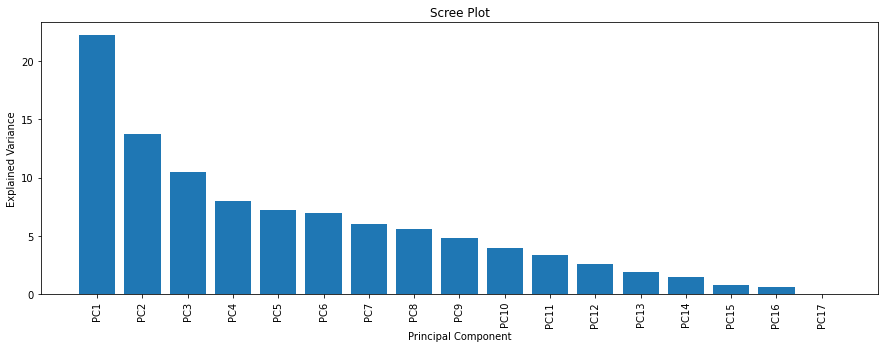

In [66]:
# Visualisation of the PC's 

per_var = np.round(pca_cc.explained_variance_ratio_*100,decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(15, 5))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.title('Scree Plot')
plt.show()

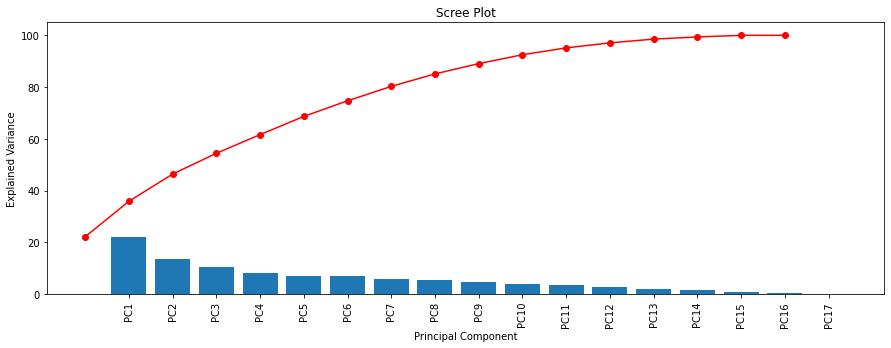

In [67]:
# Scree plot 
per_var = np.round(pca_cc.explained_variance_ratio_*100,decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(15, 5))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.plot(np.cumsum(pca_cc.explained_variance_ratio_)*100,'r-o',label="Cum EV")
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.title('Scree Plot')
plt.show()

*Observation:*

From the graphs it can been seen that the maximum variance can be explained by more number of principal componenets, from 17 components we may atleast need 12-13 PC's to explain 95% of the varaince in the dataset. The main problem is because most of the features in the dataset are not correlated with eachother in input features except Al and temp in k.

In [68]:
# Choosing 12 PCA to explain the variance 

nitems = 12
pca_cc = PCA(n_components=nitems)
X_pca = pca_cc.fit_transform(X_cc)
explained_variance = pca_cc.explained_variance_ratio_
explained_variance.sum()

0.9514312513336463

*Comment:* 

This dataset also as similar to the input features with chemical composition, physical metallurgical parameters and age hardening parameters, we will need 12 PC's to explain about 95% of variance in the dataset.

In [69]:
# model initialization without selecting any hyperparameters
models = [LinearRegression(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor()]

# Clearnig the previous data
rmse.clear()
r2val.clear()
cv_score.clear()
mae.clear()
cv_graph.clear()

# Intial model implementation
model_gen(X_pca_cc,y_train)

------------------------------------ LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ------------------------------------


Mean absolute error  15.2033
----------------------------------------------------------
Root mean squared error 19.441789981415894
----------------------------------------------------------
Mean of Cross Validation Score 0.5905
----------------------------------------------------------
R squared value 0.34078082005991395
----------------------------------------------------------


------------------------------------ SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) ------------------------------------


Mean absolute error  15.6223
----------------------------------------------------------
Root mean squared error 20.76091459533151
----------------------------------------------------------
Mean of Cross Validation Score 0.5199
--------

In [70]:
# Printing the results in a tabular form

compiled_result_df = pd.DataFrame({'Models':models_short,'MAE' : mae,
                                'RMSE' : rmse,
                                'R_Squared' : r2val,
                                'cv_score_val': cv_score }, 
                                columns=['Models','MAE','RMSE', 'R_Squared','cv_score_val'])

fig = ff.create_table(round(compiled_result_df,4))
fig.layout.width=1000

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
    
fig.update_layout(
    title_text = 'Output of Initial model development with chemical and age harening parameters',
    margin = {'t':50}
)
    
fig.show()

*Observation:*

In this dataset as well the Random forest regressor dataset performed better compared to other models. Also the R square value on the training set and cross validation set seems to be high when compared with the other models and they are also on par with the models created by the entire dataset. Therefore it can also be interpreted that chemical composition along with age hardening parameters also provides more insight to the dataset inorder to predict the target variable.

In [71]:
# 10 fold cross validation plot for different models

fig = go.Figure()
for i in range (len(models_short)):
  fig.add_trace(go.Scatter(x=n_folds, y=cv_graph[i],
                      mode='lines+markers',
                      name=models_short[i]))
fig.update_layout(
    title = "R squared value of the validation set in 10 fold cross validation",
    xaxis_title="Number of folds",
    yaxis_title="R Squared values"
)

fig.show()

In [72]:
fig = make_subplots(rows=1, cols=3, shared_xaxes=True,subplot_titles=("MAE Value","RMSE Value", "R2 Value"))
fig.add_trace(go.Bar(x=models_short, y=mae, marker=dict(coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=models_short, y=rmse, marker=dict(coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Bar(x=models_short, y=r2val, marker=dict(coloraxis="coloraxis")), 1, 3)

# Update xaxis properties
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Models", row=1, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="Mean absolute error", row=1, col=1)
fig.update_yaxes(title_text="Root mean square error", row=1, col=2)
fig.update_yaxes(title_text="R squared value", row=1, col=3)

fig.update_layout(showlegend=False)
fig.show()

In [73]:
# Hyper-Parameter Tuning using Randomized search CV

rf = RandomForestRegressor()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
{'max_depth': [5, 10, 15, 20, 25, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [74]:
# Random search of parameters, using 5 fold cross validation, 
# search across 500 different combinations

#rf_random = rf_grid(X_pca_cc,y_train)

In [75]:
# the following codes will be commented as it took 28 mins to run the code
# results will be provided though image

#rf_grid_result()

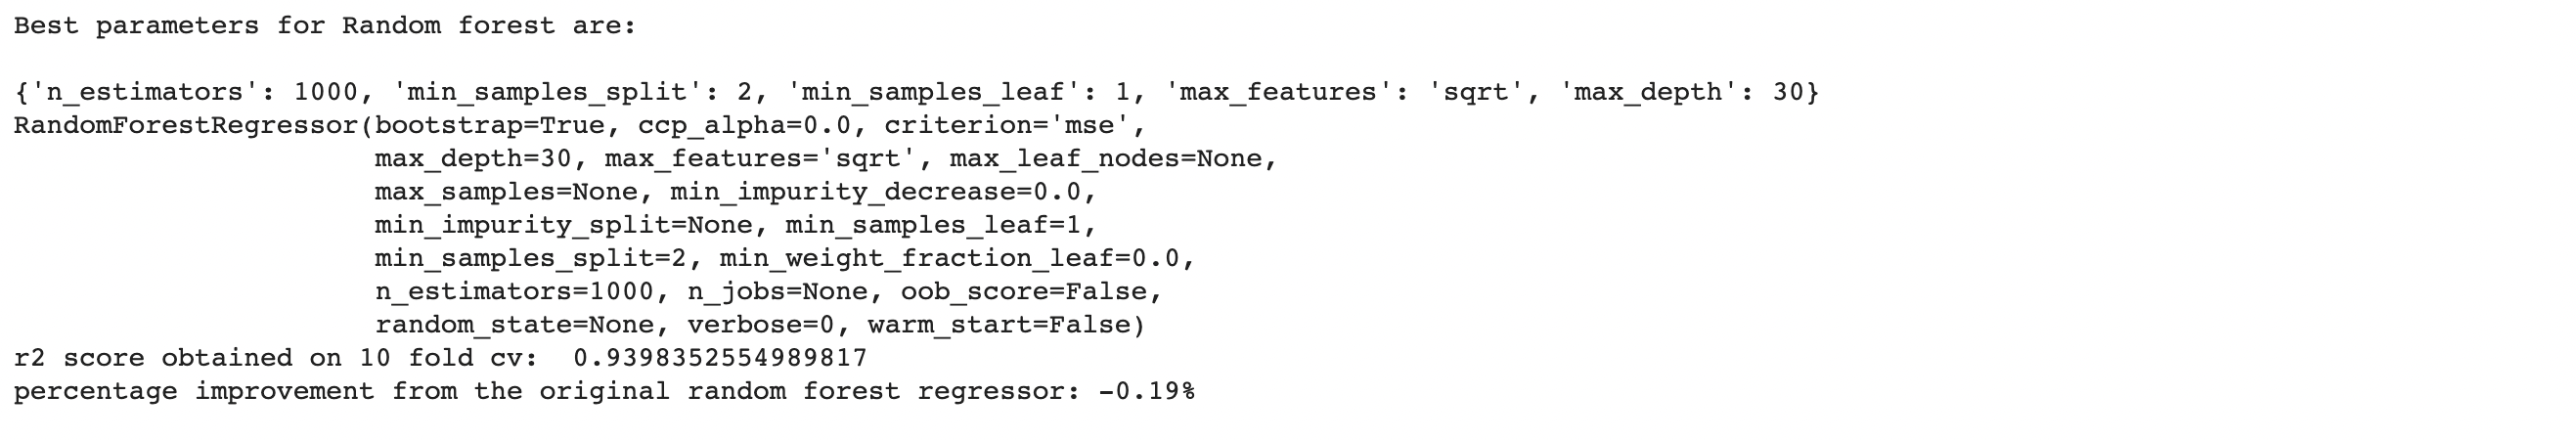

In [76]:
# printing the image of the result
img1 = cv2.imread("/content/HP_RF_2.png")
cv2_imshow(img1)

*Observation:*

From the hyperparameter optimization using random search CV, itseems like the basic hyperparameters itself is producing the highest accuracy values.

In [77]:
# Tuning KNN model

#best_model = knn_grid(X_pca_cc,y_train)

In [78]:
#Print The value of best Hyperparameters for KNN regressor

#knn_grid_result()

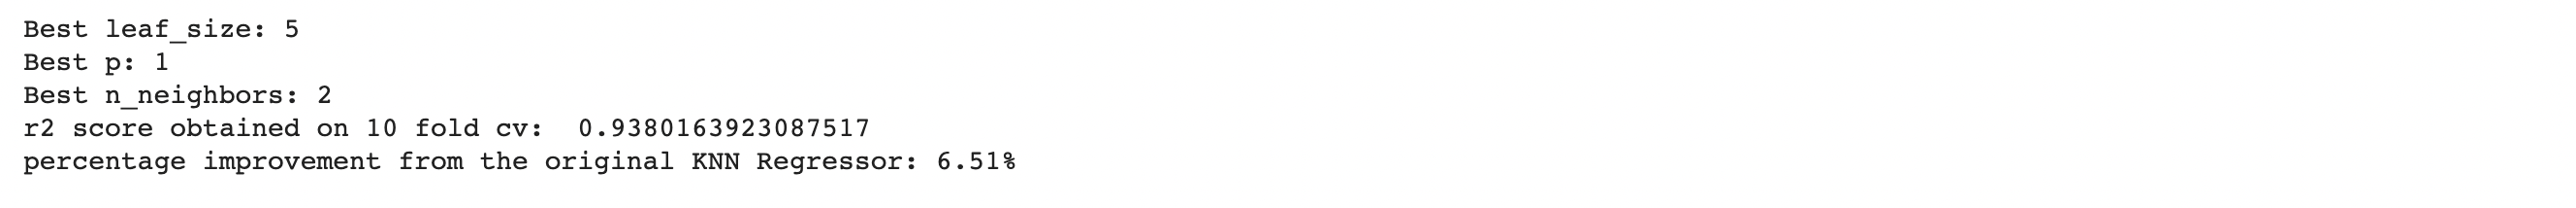

In [79]:
# printing the image of the result - KNN
img1 = cv2.imread("/content/HP_KNN_2.png")
cv2_imshow(img1)

In [80]:
# Hyper-parameter tuning for GBT

#search = gbt_grid (X_pca_cc,y_train)

In [81]:
# Calling the function to get the results of the GBT
#gbt_grid_result ()

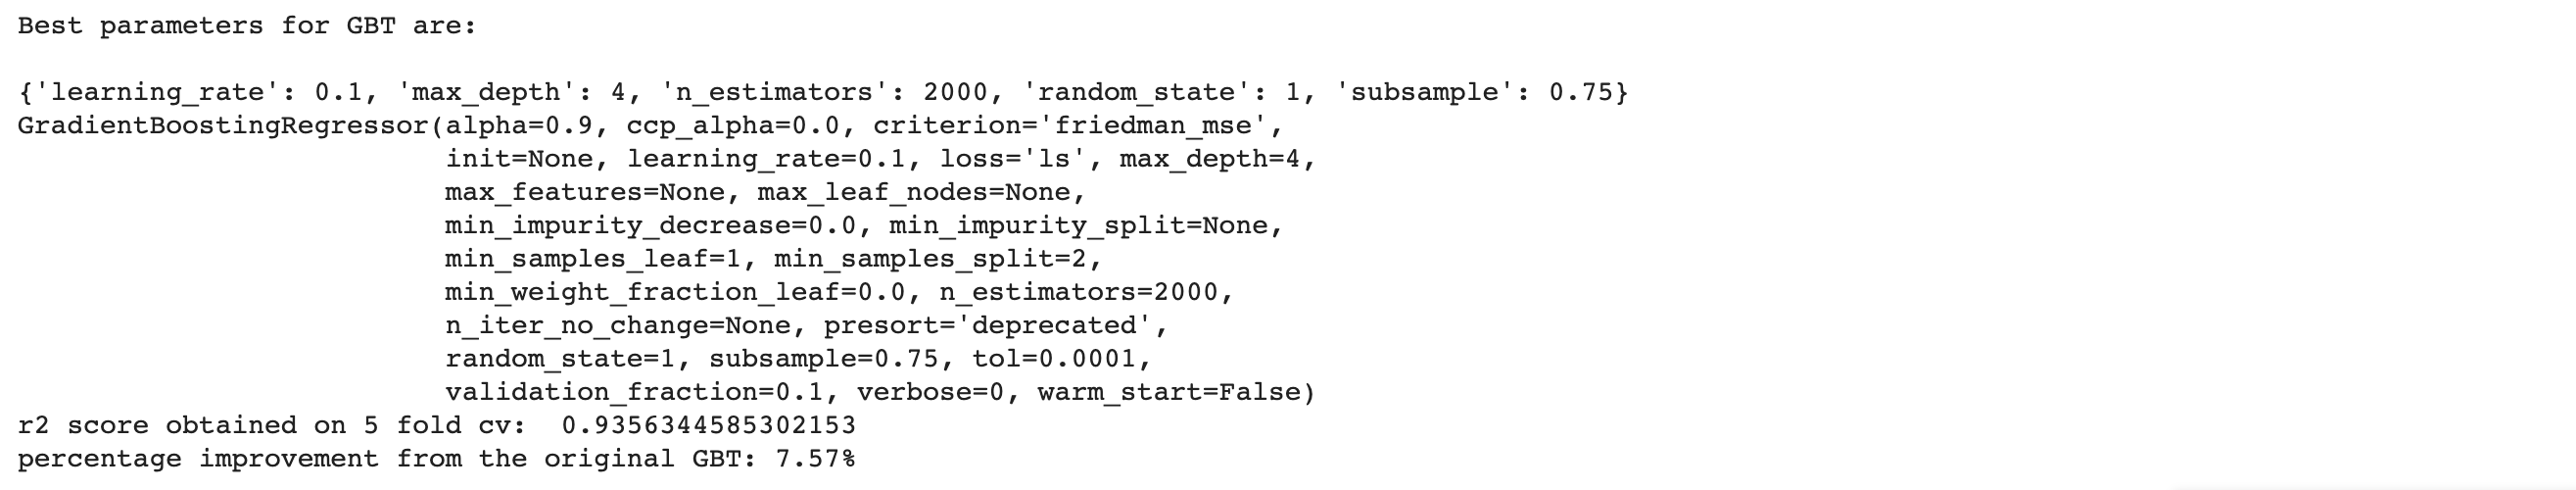

In [82]:
# printing the image of the result
img1 = cv2.imread("/content/HP_GBT_2.png")
cv2_imshow(img1)

In [83]:
# Hyper-parameter optimization in xg boost regressor
# calling function to implement 

#gsearch = xgbgrid(X_pca_cc,y_train)

In [84]:
# Checking the result of XgBoost regressor
#xgbgrid_result()

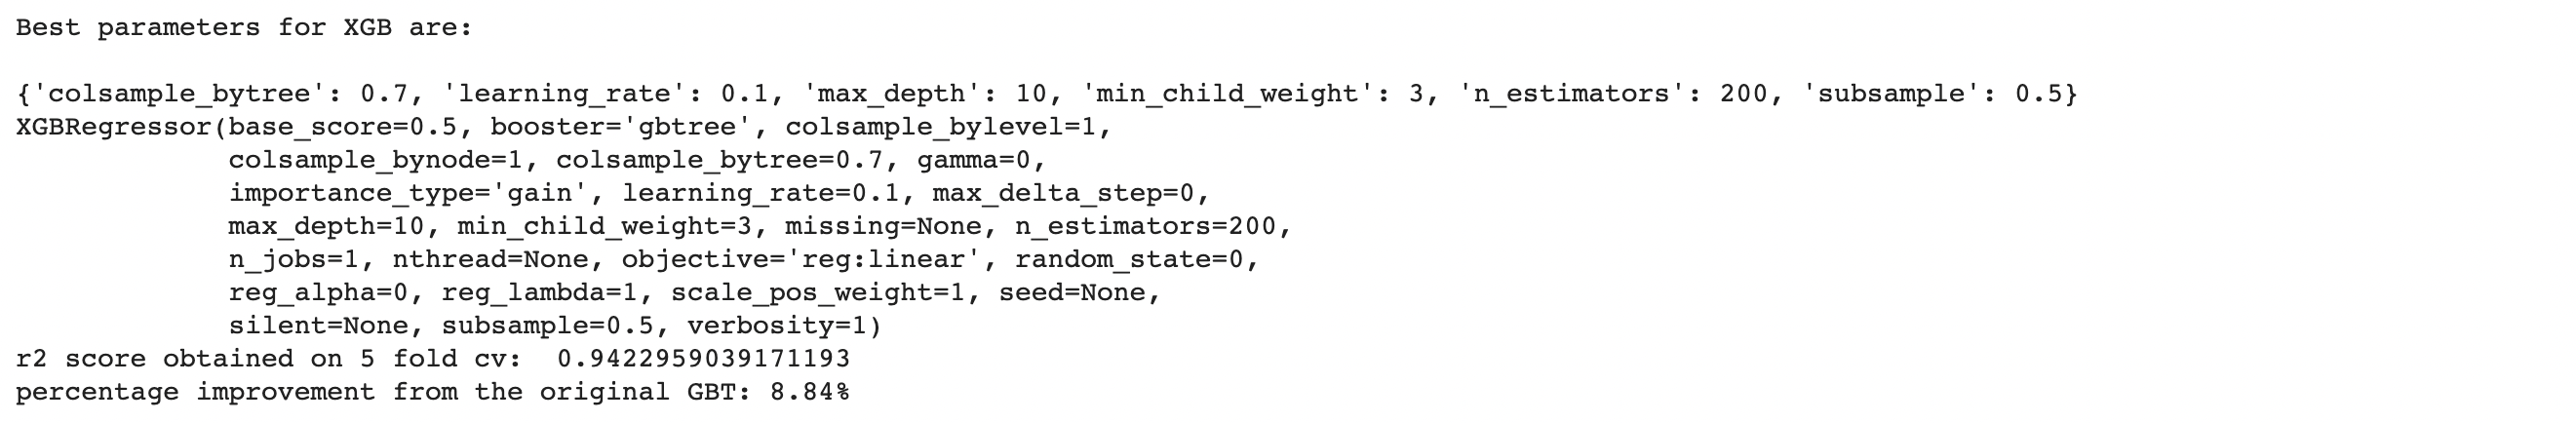

In [85]:
# printing the image of the result
img1 = cv2.imread("/content/HP_XGB_2.png")
cv2_imshow(img1)

In [86]:
# Models after hyper-parameter tuning

rmse.clear()
r2val.clear()
cv_score.clear()
mae.clear()
cv_graph.clear()
models = [LinearRegression(),
          SVR(),
          KNeighborsRegressor(algorithm='auto', leaf_size=5, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                    weights='uniform'),
          RandomForestRegressor(),
          GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False),
          xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)]

In [87]:
# model generation after hyper-parameter optimization

model_gen(X_pca_cc,y_train)

------------------------------------ LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ------------------------------------


Mean absolute error  15.2033
----------------------------------------------------------
Root mean squared error 19.441789981415894
----------------------------------------------------------
Mean of Cross Validation Score 0.5905
----------------------------------------------------------
R squared value 0.34078082005991395
----------------------------------------------------------


------------------------------------ SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) ------------------------------------


Mean absolute error  15.6223
----------------------------------------------------------
Root mean squared error 20.76091459533151
----------------------------------------------------------
Mean of Cross Validation Score 0.5199
--------

In [88]:
# Tabulation of CV score after hyper parameter tuning
# For random forest initial CV score is taken as it is the maximum rather than in randon search CV

compiled_result_df = pd.DataFrame({'Models':models_short,'MAE' : mae,
                                'RMSE' : rmse,
                                'R_Squared' : r2val,
                                'cv_score_val': cv_score }, 
                                columns=['Models','MAE','RMSE', 'R_Squared','cv_score_val'])

fig = ff.create_table(round(compiled_result_df,4))
fig.layout.width=1000

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
    
fig.update_layout(
    title_text = 'Output of Final model development - Input parameter (chemical comp & age hardening parameters)',
    margin = {'t':50}
)
    
fig.show()

*Inference:*

From the result tabulated, it is clear that the XGBoost and GBT performed better than other models. However since XGBoost regressor provides higher CV score, XG boost model is taken for testing.

In [89]:
fig = make_subplots(rows=1, cols=3, shared_xaxes=True,subplot_titles=("MAE Value","RMSE Value", "R2 Value"))
fig.add_trace(go.Bar(x=models_short, y=mae, marker=dict(coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=models_short, y=rmse, marker=dict(coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Bar(x=models_short, y=r2val, marker=dict(coloraxis="coloraxis")), 1, 3)

# Update xaxis properties
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Models", row=1, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="Mean absolute error", row=1, col=1)
fig.update_yaxes(title_text="Root mean square error", row=1, col=2)
fig.update_yaxes(title_text="R squared value", row=1, col=3)

fig.update_layout(showlegend=False,)
fig.show()

In [90]:
# 10 fold cross validation plot for different models

fig = go.Figure()
for i in range (len(models_short)):
  fig.add_trace(go.Scatter(x=n_folds, y=cv_graph[i],
                      mode='lines+markers',
                      name=models_short[i]))
fig.update_layout(
    title = "R squared value of the validation set in 10 fold cross validation",
    xaxis_title="Number of folds",
    yaxis_title="R Squared values"
)

fig.show()

In [91]:
# Standardizing the test data using the training set standard scaler
X_test_cc = sc_cc.transform(x_test)
X_pca_test_cc = pca_cc.transform(X_test_cc)

models = [xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)]
output2 = model_gen_test(X_pca_test_cc,y_test)

[12:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

*Inference:*

This result is very similar to the output of the input parameters with both chemical and physical metallurgical parameters. Therefore inorder to find the role of the physical metallurgical parameters alone with the hardness, a seperate set of models are generated along with physical metallurgical parameters and age hardening parameters alone. 

In [92]:
# distribution plot - output
hist_data = [y_test, output2]

group_labels = ['Actual Hardness', 'Predicted Hardness']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_hist=False)

fig.layout.xaxis.update({'title': 'Hardness'})
fig.layout.yaxis.update({'title': 'Density'})
fig.layout.update({'title': 'Distribution of predicted vs Actual Hardness'})
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
)
fig.show()

*Inference:*

For prediciton of hardness using chemical properties and age hardening parameters, the model using XGBoost regressor along with PCA provided the best result and almost the density and distribution of hardness for prediction and actual values were almost the same.

**3. Predication of Hardness using Physical metallurgical parameters and age hardening parameters alone**

In [93]:
# Checking for Vairation inflation factor once more for physical metallugical parameters with age harening parametes

for index in range(0, len(only_pm_names)):
            y = only_pm.loc[:, only_pm.columns == only_pm_names[index]]
            x = only_pm.loc[:, only_pm.columns != only_pm_names[index]]
            model = sm.OLS(np.array(y,dtype=float), np.array(x,dtype=float))                     #Fit ordinary least squares method
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              only_pm_names[index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 only_pm_names[index], vif)
          )
            print("\n=================================================================================\n")

R Square value of EN column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of EN column is 683917938856.57 n


R Square value of VE column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of VE column is 3680576675.52 n


R Square value of atomic_number column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of atomic_number column is 414524334057.76 n


R Square value of mass column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of mass column is 30275078836.29 n


R Square value of melting_point column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of melting_point column is 245579443.01 n


R Square value of boiling_point column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of boiling_point column is 18845405510.89 n


R Square value of Density column is 1.0 keeping all oth

*Observation:*

From the Variation inflation factor analysis, it can be understood that all the varialbles are correlated with each other in this physical metallurgical parameters. Therefore, the input dataset must definitely undergo changes to avoid multicollinearity problem when model is being generated. Apart from all the other input parameters, time is truly an independent variable along with physical metallurgical parameters aswell.

In [94]:
# splitting physical metallurgical parameters & age hardeining parameters dataset into training and testing set

x_train,x_test,y_train,y_test = train_test_split(only_pm,y_value,test_size=0.20,random_state=1)

In [95]:
# Fit transform PCA on the standardized training data
sc_pm = StandardScaler()
X_pm = sc_pm.fit_transform(x_train)
X_pm.shape

(1272, 17)

In [96]:
nitems = 17 # Intotal 17 features (Input parameters)
pca_pm = PCA(n_components=nitems)
X_pca_pm = pca_pm.fit_transform(X_pm)

In [97]:
# Total explained variance using all the Principal components
explained_variance = pca_pm.explained_variance_ratio_
explained_variance.sum()

1.0

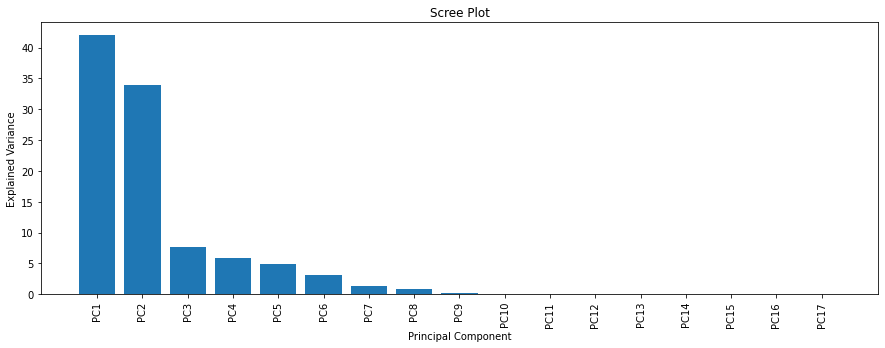

In [98]:
# Visualisation of the PC's 

per_var = np.round(pca_pm.explained_variance_ratio_*100,decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(15, 5))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.title('Scree Plot')
plt.show()

*Observation:*

Since most of the features are correlated, we have only less principal components which can explain maximum variance in our dataset.


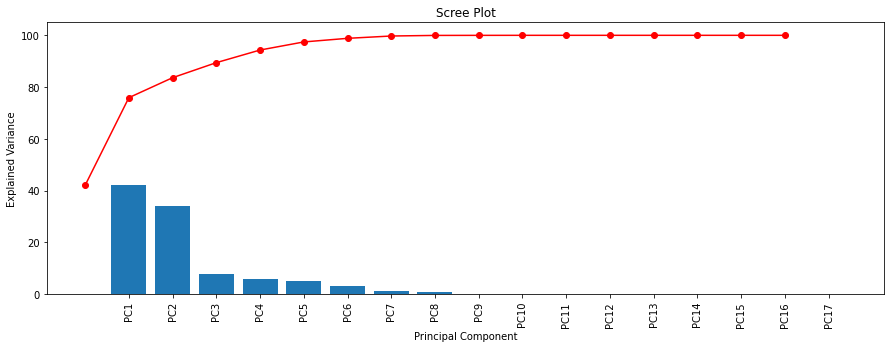

In [99]:
# Scree plot 
per_var = np.round(pca_pm.explained_variance_ratio_*100,decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(15, 5))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.plot(np.cumsum(pca_pm.explained_variance_ratio_)*100,'r-o',label="Cum EV")
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.title('Scree Plot')
plt.show()

*Observation:*

From the graph it can be seen that 95% of variance can be explained with 5-6 principal compoenents. 

In [100]:
# Choosing 6 PCA to explain the variance 

nitems = 6
pca_pm = PCA(n_components=nitems)
X_pca_pm = pca_pm.fit_transform(X_pm)
explained_variance = pca_pm.explained_variance_ratio_
explained_variance.sum()

0.974392327948176

**Model Generation**

In [101]:
models = [LinearRegression(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor()]
rmse.clear()
r2val.clear()
cv_score.clear()
mae.clear()
cv_graph.clear()
model_gen(X_pca_pm,y_train)

------------------------------------ LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ------------------------------------


Mean absolute error  16.3556
----------------------------------------------------------
Root mean squared error 20.93641621755019
----------------------------------------------------------
Mean of Cross Validation Score 0.5332
----------------------------------------------------------
R squared value 0.1455983710386265
----------------------------------------------------------


------------------------------------ SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) ------------------------------------


Mean absolute error  15.0732
----------------------------------------------------------
Root mean squared error 19.765413665959723
----------------------------------------------------------
Mean of Cross Validation Score 0.576
----------

In [102]:
# Printing the results in a tabular form

compiled_result_df = pd.DataFrame({'Models':models_short,'MAE' : mae,
                                'RMSE' : rmse,
                                'R_Squared' : r2val,
                                'cv_score_val': cv_score }, 
                                columns=['Models','MAE','RMSE', 'R_Squared','cv_score_val'])

fig = ff.create_table(round(compiled_result_df,4))
fig.layout.width=1000

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
    
fig.update_layout(
    title_text = 'Output of Initial model development with PM and age harening parameters',
    margin = {'t':50}
)
    
fig.show()

In [103]:
# Plotting the cross validation results throughout 10 folds
fig = go.Figure()
for i in range (len(models_short)):
  fig.add_trace(go.Scatter(x=n_folds, y=cv_graph[i],
                      mode='lines+markers',
                      name=models_short[i]))
fig.update_layout(
    title = "R squared value of the test set in 10 fold cross validation"
)

fig.show()

*Observation:*

From the graph and table before it can be understood that, like before for input parameters (PM and age harening parameters) Random forest regressor gives best result when hyper-parameter is not optimized.

In [104]:
# Plotting the initial results
fig = make_subplots(rows=1, cols=3, shared_xaxes=True,subplot_titles=("MAE Value","RMSE Value", "R2 Value"))
fig.add_trace(go.Bar(x=models_short, y=mae, marker=dict(coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=models_short, y=rmse, marker=dict(coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Bar(x=models_short, y=r2val, marker=dict(coloraxis="coloraxis")), 1, 3)

fig.update_layout(showlegend=False)
fig.show()

*Obervation:*

Since random forest performed better than other models, the same has to be tested with testing data to check for the overfitting issues, which are very common in tree plots. Also, other models underwent hyper parameter tuning to obtain the best possible model for the input parameter.

In [105]:
# Random search of parameters, using 5 fold cross validation, 
# search across 500 different combinations

#rf_random = rf_grid(X_pca_pm,y_train)

In [106]:
# printing the best estimator after searching through randomsearch CV
#rf_grid_result()

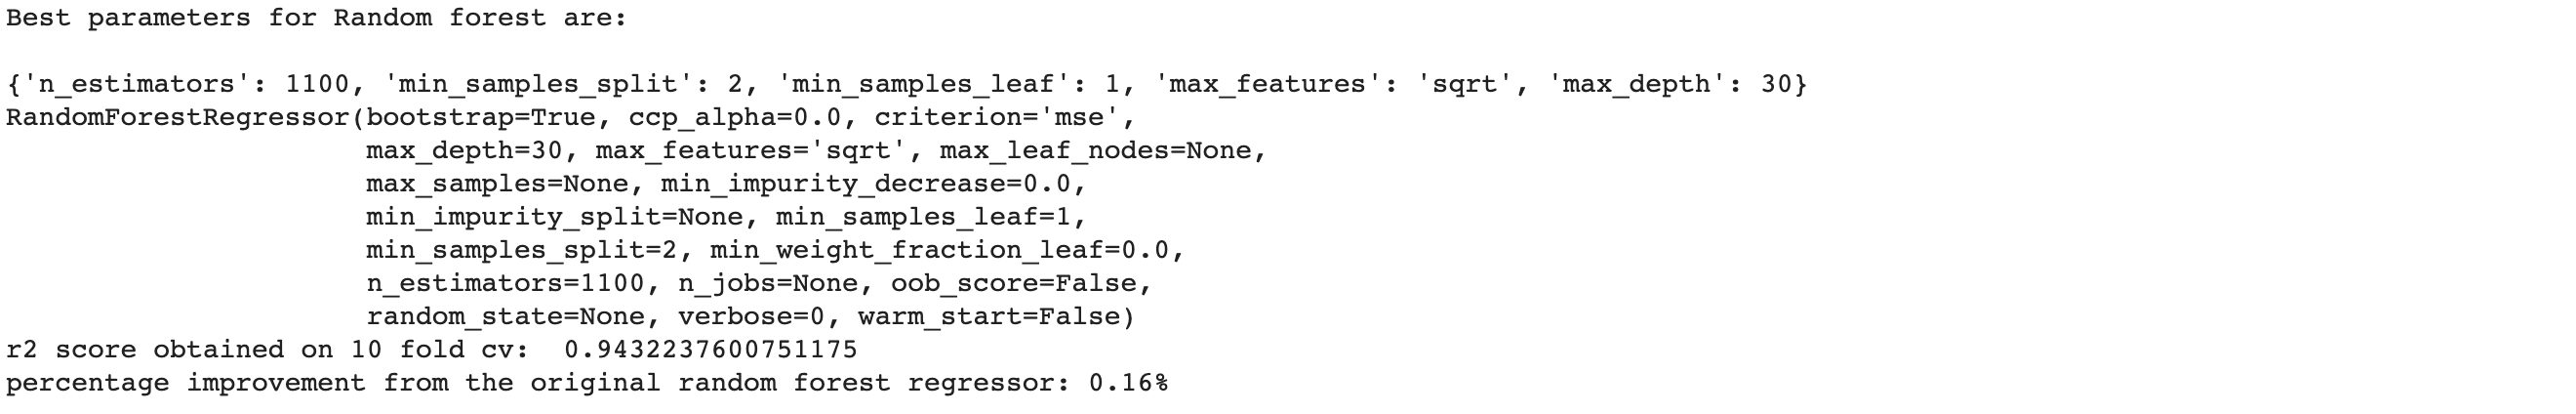

In [107]:
# printing the image of the result
img1 = cv2.imread("/content/HP_RF_3.png")
cv2_imshow(img1)

In [108]:
# Hyper-parameter tuning - KNN model

#best_model = knn_grid(X_pca_pm,y_train)

In [109]:
# Hyper-parameter tuning result for KNN model

#knn_grid_result()

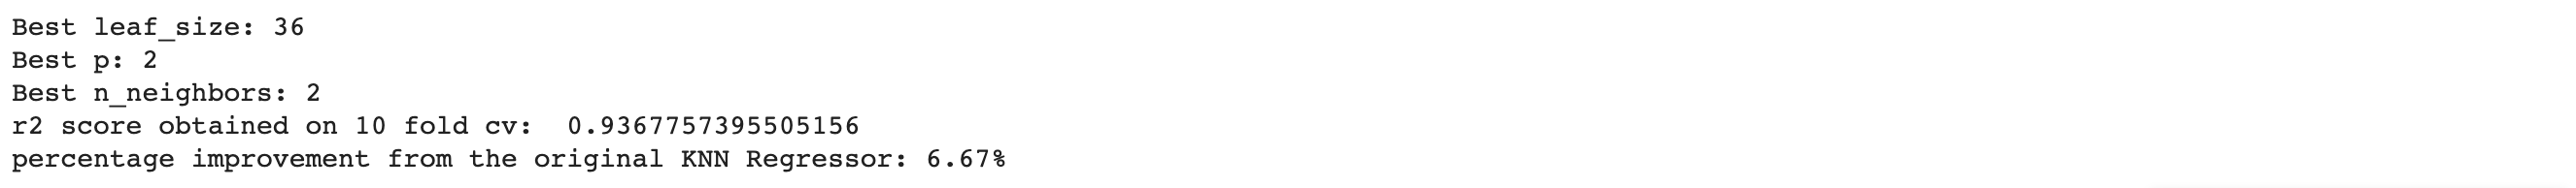

In [110]:
# printing the image of the result
img1 = cv2.imread("/content/HP_KNN_3.png")
cv2_imshow(img1)

In [111]:
# Hyper-Parameter tuning - GBT model

#search = gbt_grid (X_pca_pm,y_train)

In [112]:
# Hyper-parameter tuning result for GBT model

#gbt_grid_result()

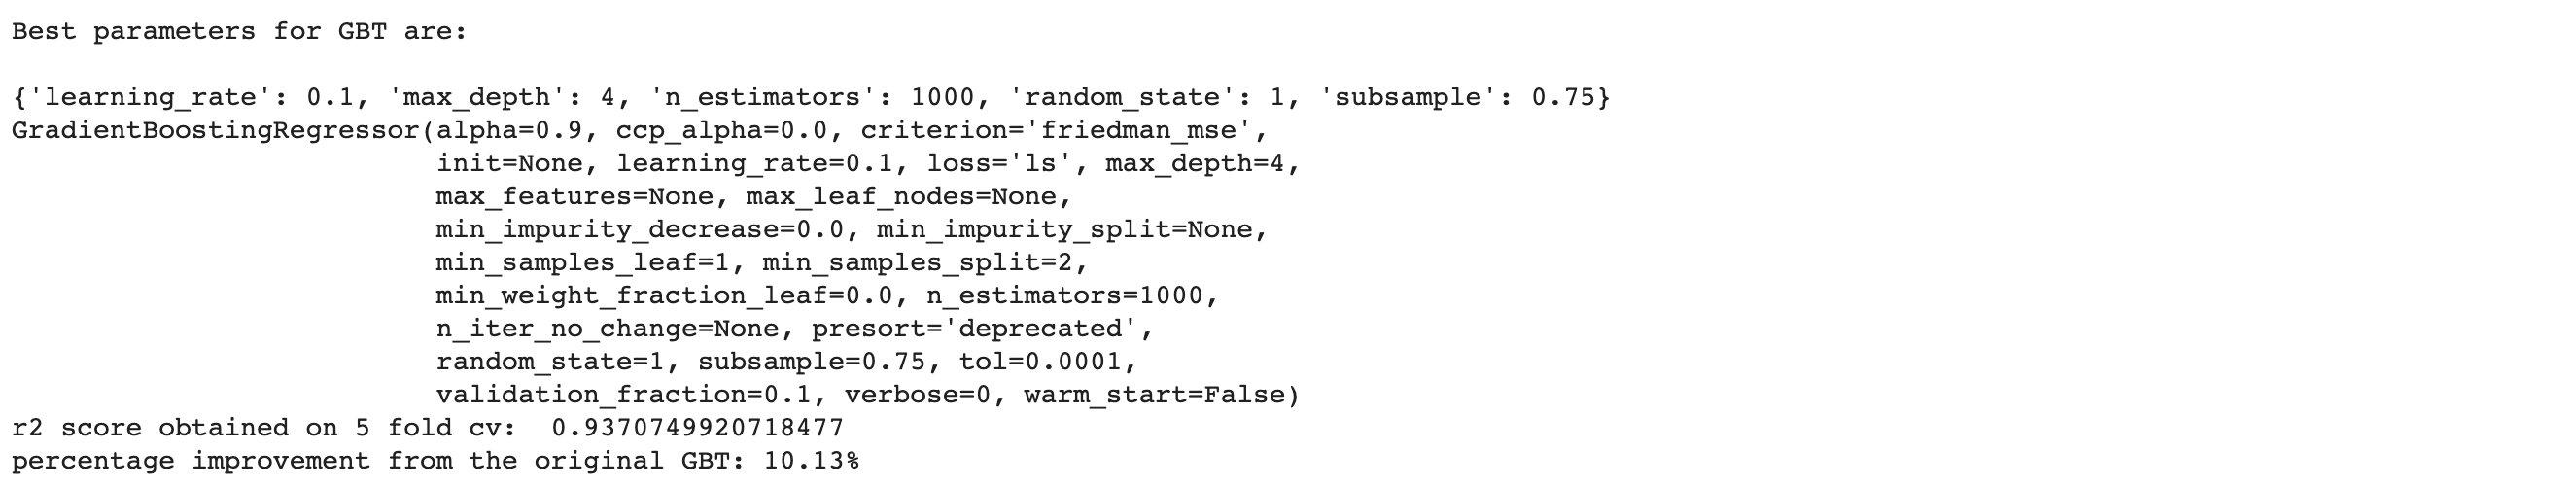

In [113]:
# printing the image of the result
img1 = cv2.imread("/content/HP_GBT_3.png")
cv2_imshow(img1)

In [114]:
# Hyper-Parameter tuning - XGB regressor model

#gsearch = xgbgrid(X_pca_pm,y_train)

In [115]:
# Result for hyper-parameter tuned XGB regressor model

#xgbgrid_result()

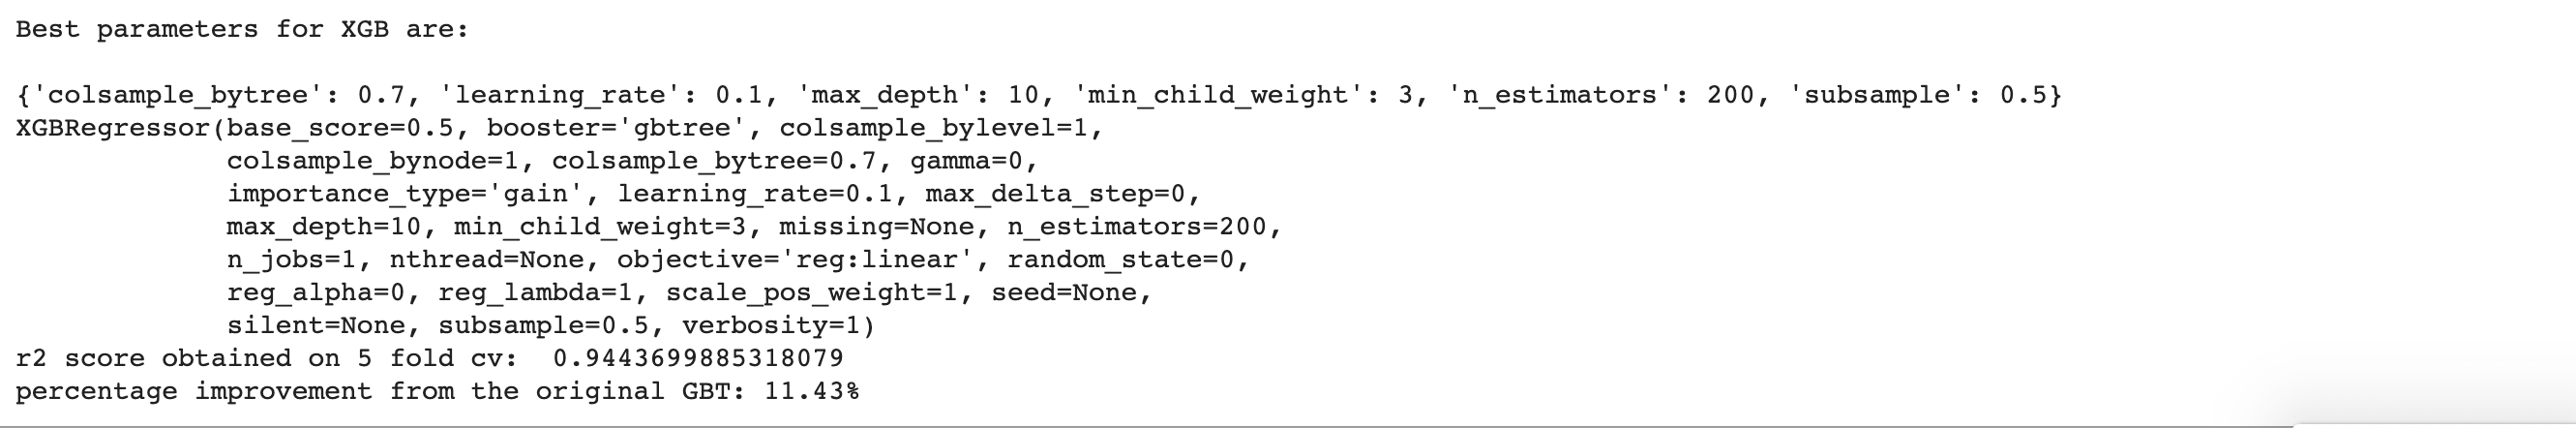

In [116]:
# printing the image of the result
img1 = cv2.imread("/content/HP_XGB_3.png")
cv2_imshow(img1)

In [117]:
# Models after hyper-parameter tuning

rmse.clear()
r2val.clear()
cv_score.clear()
mae.clear()
cv_graph.clear()
models = [LinearRegression(),
          SVR(),
          KNeighborsRegressor(algorithm='auto', leaf_size=36, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform'),
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False),
          GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False),
          xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)]

In [118]:
# Model generation after hyper parameter tuning 

model_gen(X_pca_pm,y_train)

------------------------------------ LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ------------------------------------


Mean absolute error  16.3556
----------------------------------------------------------
Root mean squared error 20.93641621755019
----------------------------------------------------------
Mean of Cross Validation Score 0.5332
----------------------------------------------------------
R squared value 0.1455983710386265
----------------------------------------------------------


------------------------------------ SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) ------------------------------------


Mean absolute error  15.0732
----------------------------------------------------------
Root mean squared error 19.765413665959723
----------------------------------------------------------
Mean of Cross Validation Score 0.576
----------

In [119]:
# Tabulation of CV score after hyper parameter tuning
# Unlike other two sets of models, RF performed better after hyper-parameter tuning

compiled_result_df = pd.DataFrame({'Models':models_short,'MAE' : mae,
                                'RMSE' : rmse,
                                'R_Squared' : r2val,
                                'cv_score_val': cv_score }, 
                                columns=['Models','MAE','RMSE', 'R_Squared','cv_score_val'])

fig = ff.create_table(round(compiled_result_df,4))
fig.layout.width=1000

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
    
fig.update_layout(
    title_text = 'Output of Final model development - Input parameter (PM & age hardening parameters)',
    margin = {'t':50}
)
    
fig.show()

In [120]:
fig = make_subplots(rows=1, cols=3, shared_xaxes=True,subplot_titles=("MAE Value","RMSE Value", "R2 Value"))
fig.add_trace(go.Bar(x=models_short, y=mae, marker=dict(coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=models_short, y=rmse, marker=dict(coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Bar(x=models_short, y=r2val, marker=dict(coloraxis="coloraxis")), 1, 3)

# Update xaxis properties
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Models", row=1, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="Mean absolute error", row=1, col=1)
fig.update_yaxes(title_text="Root mean square error", row=1, col=2)
fig.update_yaxes(title_text="R squared value", row=1, col=3)

fig.update_layout(showlegend=False,)
fig.show()

In [121]:
# 10 fold cross validation plot for different models

fig = go.Figure()
for i in range (len(models_short)):
  fig.add_trace(go.Scatter(x=n_folds, y=cv_graph[i],
                      mode='lines+markers',
                      name=models_short[i]))
fig.update_layout(
    title = "R squared value of the validation set in 10 fold cross validation",
    xaxis_title="Number of folds",
    yaxis_title="R Squared values"
)

fig.show()

Testing the model using Test set

In [122]:
# Standardizing the test data using the training set standard scaler
X_test_pm = sc_pm.transform(x_test)
X_pca_test_pm = pca_pm.transform(X_test_pm)

models = [xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)]
output3 = model_gen_test(X_pca_test_pm,y_test)

[13:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

*Observation:*

The value predicted is of 0.9984, which is also on par with the output that we got for model developed with all three different sets of input features.

Therfore, it can be understood that, since chemical composition are the imperitive force that leads to different physical metallurgical values corresponding to particular hardness, we can very well use chemical composition or physical metallurgical properties alone to predict the characteristic target variable in material design.

Also, from the fact that Time in mins was the only independent feature when checked under Variation inflation analysis, provided lot of insight to the prediction of the output.

In [123]:
# Distribution and density plot for the output

hist_data = [y_test, output3]

group_labels = ['Actual Hardness', 'Predicted Hardness']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_hist=False)

fig.layout.xaxis.update({'title': 'Hardness'})
fig.layout.yaxis.update({'title': 'Density'})
fig.layout.update({'title': 'Distribution of predicted vs Actual Hardness'})
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
)
fig.show()

*Inference:*

Similar to both the set of input features, using XGBoost regressor we were able to obtain the best model for prediciton of hardness. 

In [124]:
# plot for checking the input feature relevance

fig = go.Figure()
fig.add_trace(go.Scatter(x=['CC+PM+AH','CC+AH','PM+AH'], y=[0.782,0.736,0.786],
                    mode='lines+markers',
                    name='MAE',line_shape='spline'))
fig.add_trace(go.Scatter(x=['CC+PM+AH','CC+AH','PM+AH'], y=[1.1604,1.133,1.2275],
                    mode='lines+markers',
                    name='RMSE',line_shape='spline'))
fig.add_trace(go.Scatter(x=['CC+PM+AH','CC+AH','PM+AH'], y=[0.9986,0.9987,0.9984],
                    mode='lines+markers',
                    name='R-Squared',line_shape='spline'))
fig.update_layout(autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=200,
        t=110))
fig.show()

*Inference:*

From the plot it can be clearly seen that the dataset with chemical composition and age hardening parameters produced the best result compared to other models. Since physical metallurgical parameters are derivative of the chemical composition, the model was able to perfectly predict with the chemical compositional parameters and age hardening parameters alone.